In [2]:
import pandas as pd

df = pd.read_csv('train.csv').drop('id', axis=1)
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


# Skew Transformation

In [4]:
df.describe()

,price
count,5.163500e+04
mean,4.532253e+05
std,1.793287e+06
min,2.000000e+04
25%,7.000000e+04
50%,1.500000e+05
75%,3.600000e+05
max,1.000000e+08


In [5]:
df

,plate,date,price
0,X059CP797,2024-12-26 00:00:00,65000
1,Y800MH790,2024-07-12 21:31:37,100000
2,A212TX77,2024-04-18 00:00:00,290000
3,P001AY199,2025-01-03 00:27:15,680000
4,P001AY199,2025-01-10 09:32:41,750000
...,...,...,...
51630,X023PP797,2025-01-29 00:00:00,70000
51631,M004KA161,2025-01-31 00:00:00,1600000
51632,E888EB199,2025-02-06 00:00:00,850000
51633,X023XK77,2024-04-24 11:30:07,150000


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


Before: p-value = 2.9831829666767536e-159
Box-Cox: p-value = 7.260697834436688e-46
Yeo-Johnson: p-value = 7.250246950859469e-46


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)
/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


Quantile: p-value = 2.0869159325022442e-29
logarithm: p-value = 9.821686131631176e-72


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 51635.
  res = hypotest_fun_out(*samples, **kwds)


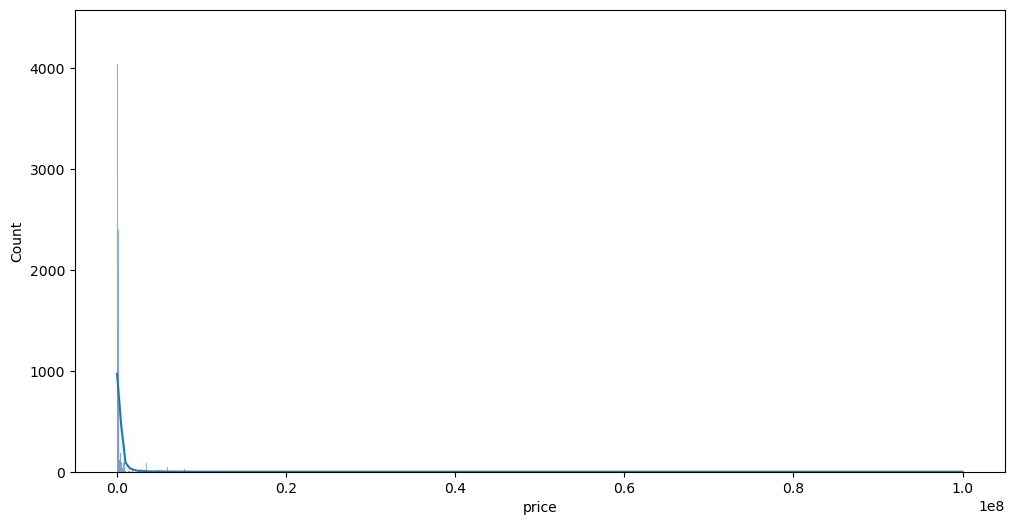

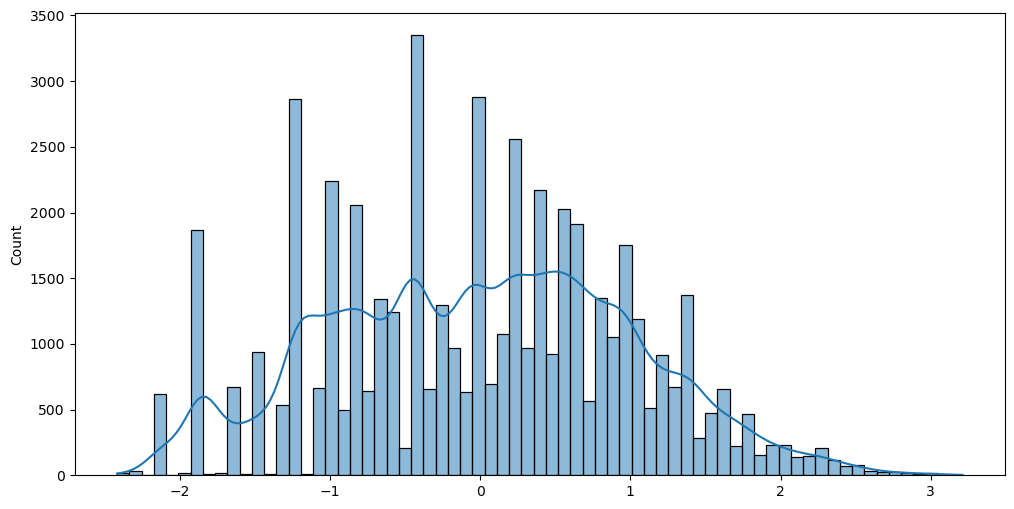

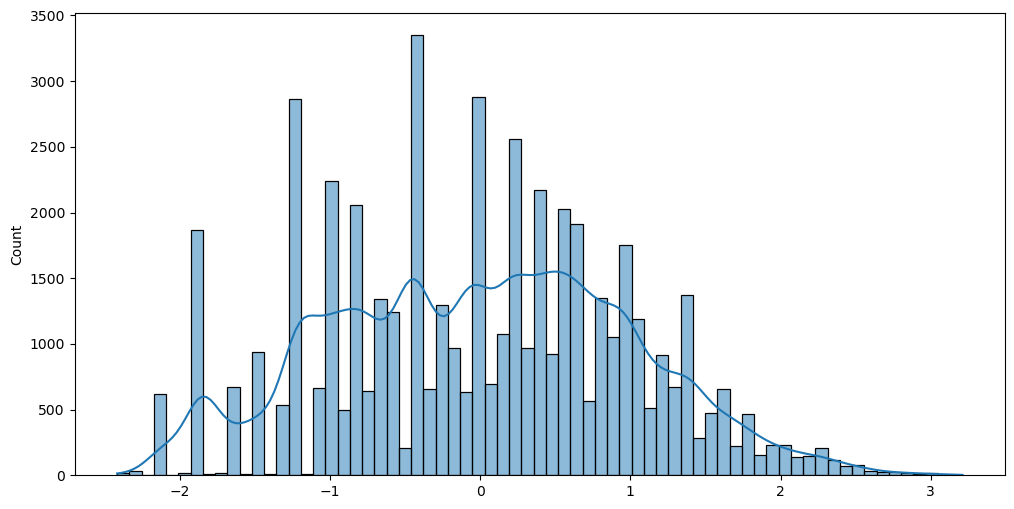

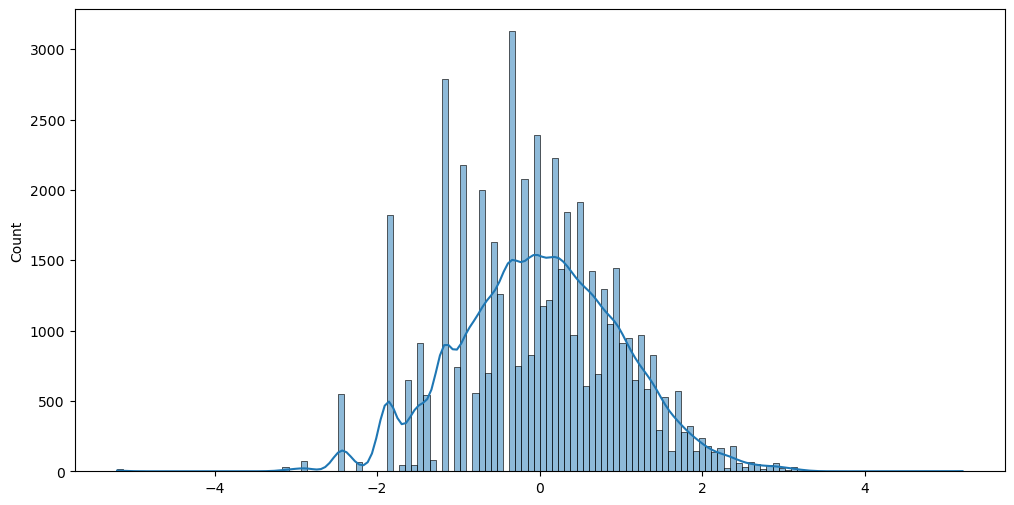

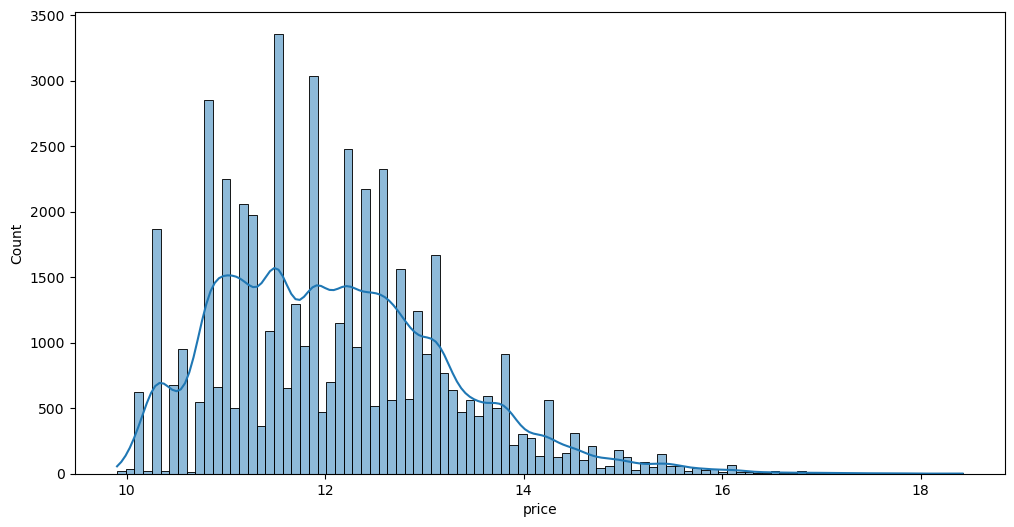

In [6]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns



plt.figure(figsize=(12, 6))

sns.histplot(
    data=df,
    x=df['price'],
    kde=True,
)

_, p_value = stats.shapiro(df['price'])
print(f"Before: p-value = {p_value:}")

from sklearn.preprocessing import PowerTransformer

transformers = {
    "Box-Cox": PowerTransformer(method="box-cox"),
    "Yeo-Johnson": PowerTransformer(method="yeo-johnson"),
    "Quantile": QuantileTransformer(output_distribution='normal')
}

for name, transformer in transformers.items():
    transformed = transformer.fit_transform(df[['price']])
    _, p_value = stats.shapiro(transformed.flatten())
    plt.figure(figsize=(12, 6))
    sns.histplot(
            data=df,
            x=transformed.flatten(),
            kde=True)
    plt.plot()
    print(f"{name}: p-value = {p_value}")
    df[f'price_{name}'] = transformed.flatten()

transformed = df['price'].apply(np.log1p)
_, p_value = stats.shapiro(transformed)
plt.figure(figsize=(12, 6))
sns.histplot(
        data=df,
        x=transformed,
        kde=True)
plt.plot()
print(f"logarithm: p-value = {p_value}")

df['price_log'] = df['price'].apply(np.log1p)

As we could see how much transformation help us in skewnes

In [11]:
for transformed_columns in df.columns:
    if 'price_' in transformed_columns:
        display(df[transformed_columns].describe())

count    5.163500e+04
mean    -1.084907e-15
std      1.000010e+00
min     -2.416163e+00
25%     -8.203585e-01
50%     -4.290573e-02
75%      7.041052e-01
max      3.211052e+00
Name: price_Box-Cox, dtype: float64

count    5.163500e+04
mean    -2.587044e-15
std      1.000010e+00
min     -2.416143e+00
25%     -8.203610e-01
50%     -4.290661e-02
75%      7.041068e-01
max      3.211027e+00
Name: price_Yeo-Johnson, dtype: float64

count    51635.000000
mean         0.002860
std          1.002252
min         -5.199338
25%         -0.718462
50%         -0.051460
75%          0.684763
max          5.199338
Name: price_Quantile, dtype: float64

count    51635.000000
mean        12.102829
std          1.158811
min          9.903538
25%         11.156265
50%         11.918397
75%         12.793862
max         18.420681
Name: price_log, dtype: float64

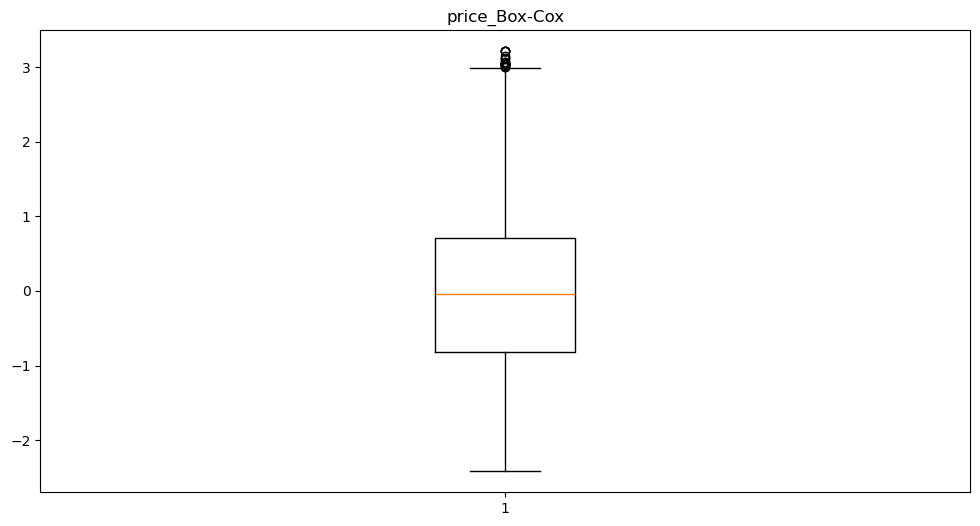

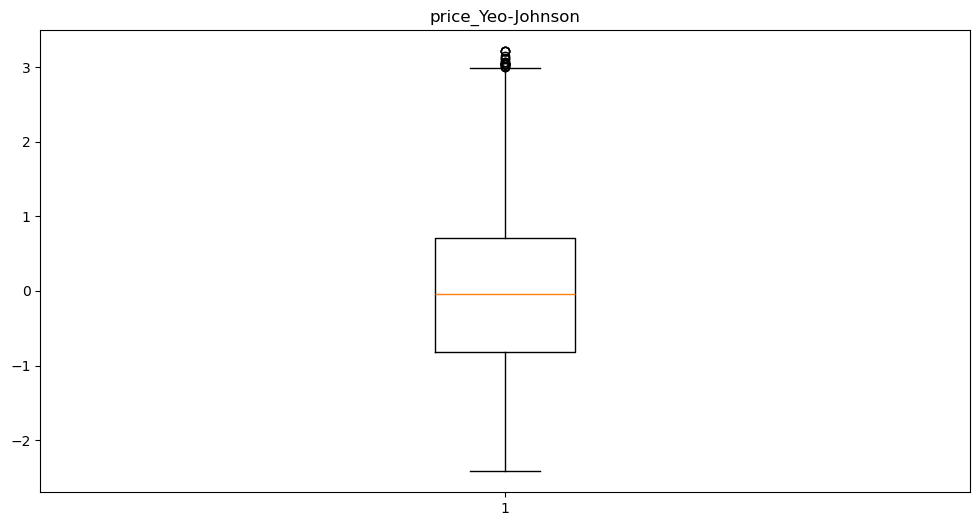

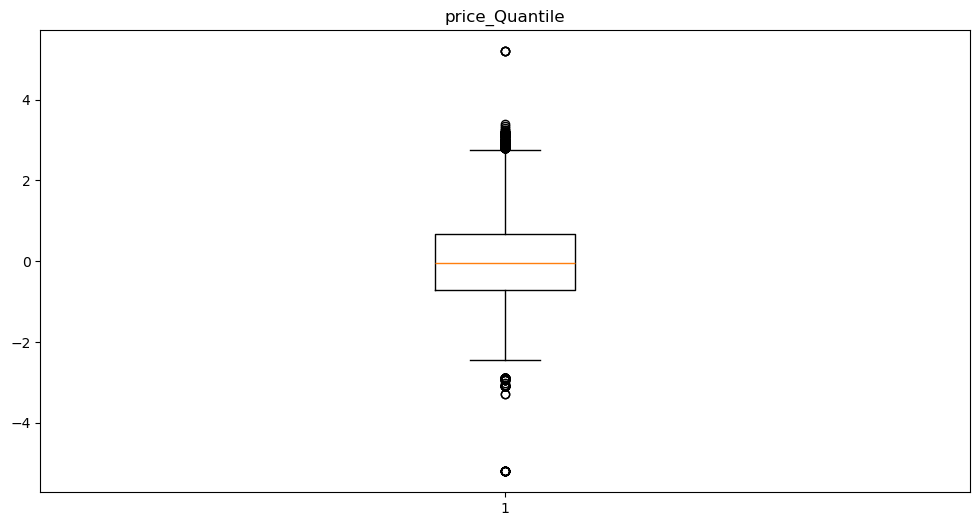

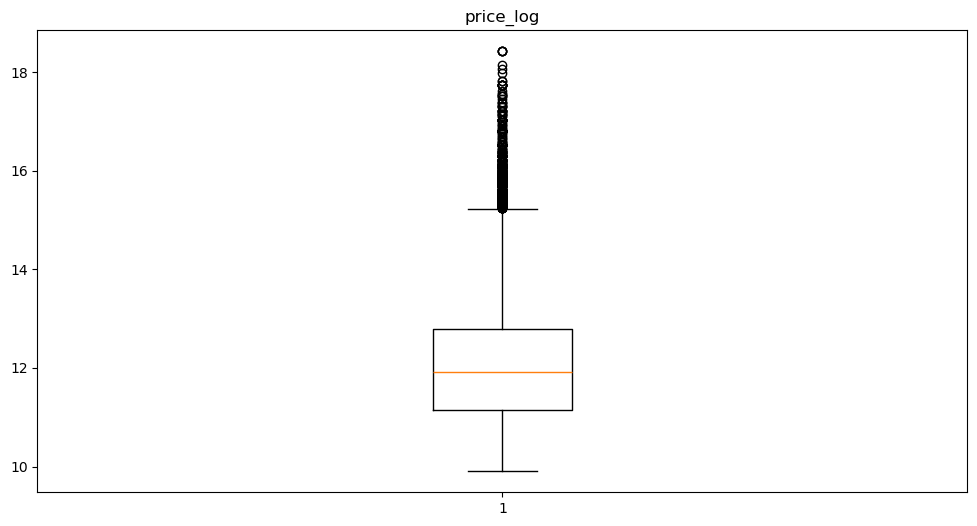

In [12]:
from matplotlib import pyplot as plt


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        plt.figure(figsize=(12, 6))
        plt.boxplot(df[transformed_column])
        plt.title(transformed_column)
        plt.plot


# Feature engineering

In [14]:
df['plate_length'] = df['plate'].str.len()

In [15]:
df['plate_length'].value_counts()

plate_length
9    36195
8    15440
Name: count, dtype: int64

In [16]:
df.groupby('plate_length').describe().T

plate_length                        8             9
price             count  1.544000e+04  3.619500e+04
                  mean   8.006511e+05  3.050210e+05
                  std    2.813470e+06  1.066669e+06
                  min    2.000000e+04  2.000000e+04
                  25%    1.200000e+05  6.500000e+04
                  50%    2.900000e+05  1.300000e+05
                  75%    6.000000e+05  2.900000e+05
                  max    1.000000e+08  1.000000e+08
price_Box-Cox     count  1.544000e+04  3.619500e+04
                  mean   4.239626e-01 -1.808532e-01
                  std    9.817824e-01  9.518769e-01
                  min   -2.416163e+00 -2.416163e+00
                  25%   -2.572868e-01 -9.030939e-01
                  50%    5.326772e-01 -1.791821e-01
                  75%    1.078332e+00  5.326772e-01
                  max    3.211052e+00  3.211052e+00
price_Yeo-Johnson count  1.544000e+04  3.619500e+04
                  mean   4.239627e-01 -1.808533e-01
                  std    9.817822e-01  9.518770e-01
                  min   -2.416143e+00 -2.416143e+00
                  25%   -2.572884e-01 -9.030964e-01
                  50%    5.326783e-01 -1.791835e-01
                  75%    1.078334e+00  5.326783e-01
                  max    3.211027e+00  3.211027e+00
price_Quantile    count  1.544000e+04  3.619500e+04
                  mean   4.225529e-01 -1.761722e-01
                  std    9.921774e-01  9.517952e-01
                  min   -5.199338e+00 -5.199338e+00
                  25%   -2.226296e-01 -8.074289e-01
                  50%    4.556403e-01 -1.689120e-01
                  75%    1.072973e+00  4.556403e-01
                  max    5.199338e+00  5.199338e+00
price_log         count  1.544000e+04  3.619500e+04
                  mean   1.260510e+01  1.188857e+01
                  std    1.236115e+00  1.053746e+00
                  min    9.903538e+00  9.903538e+00
                  25%    1.169526e+01  1.108216e+01
                  50%    1.257764e+01  1.177530e+01
                  75%    1.330469e+01  1.257764e+01
                  max    1.842068e+01  1.842068e+01

In [17]:
# Split region and registration code from the plate

df['region'] = df['plate'].apply(lambda x: x[-2:] if len(x) == 8 else x[-3:])
df['registration_code'] = df['plate'].apply(lambda x: x[1:4])
df['series_part_1'] = df['plate'].apply(lambda x: x[0])
df['series_part_2'] = df['plate'].apply(lambda x: x[4:6])
df['series'] = df['plate'].apply(lambda x: x[0] + x[4:6])

In [25]:
# get the mean price for each duplicate plate (I see some of them are use the highest)
for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        df[transformed_column] = df.groupby('plate')[transformed_column].transform('mean')
        df = df.drop_duplicates(subset='plate').reset_index(drop=True)

display(df.describe())

,price,price_Box-Cox,price_Yeo-Johnson,price_Quantile,price_log,plate_length
count,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000
mean,4.362646e+05,-0.065270,-0.066429,-0.061463,12.031245,8.695723
std,1.842495e+06,1.006180,1.007075,1.010107,1.160217,0.460106
min,2.000000e+04,-2.416163,-2.416143,-5.199338,9.903538,8.000000
25%,7.000000e+04,-0.820359,-0.820361,-0.718462,11.156265,8.000000
50%,1.500000e+05,-0.042906,-0.042907,-0.051460,11.918397,9.000000
75%,3.500000e+05,0.682227,0.682228,0.647177,12.765691,9.000000
max,1.000000e+08,3.211052,3.211027,5.199338,18.420681,9.000000


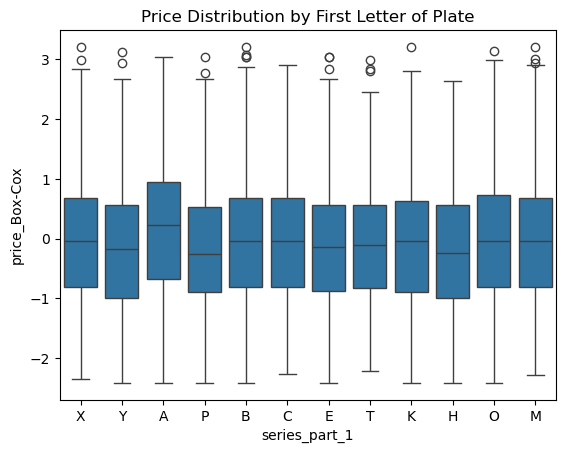

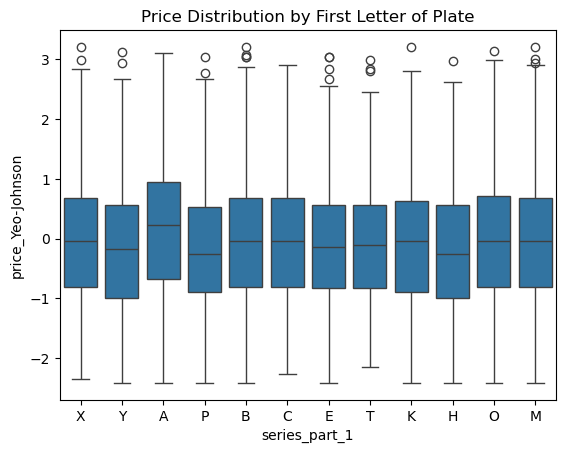

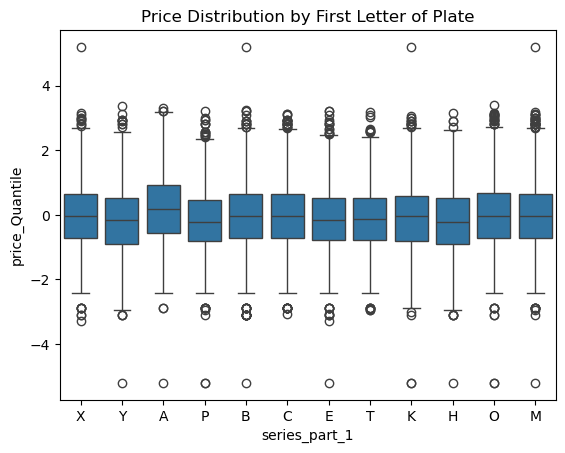

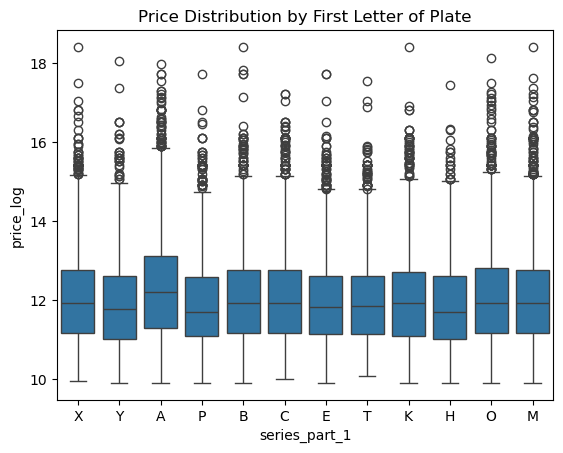

In [27]:
# findout whether the first letter is important or not 

# df.groupby('digit_1').describe()['price']


import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        data = pd.concat((df['series_part_1'], df[transformed_column]), axis=1)
        
        sns.boxplot(x='series_part_1', y=transformed_column, data=data)
        plt.title('Price Distribution by First Letter of Plate')
        plt.show()

In [29]:
import pandas as pd
import scipy.stats as stats


for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        data = pd.concat((df['series_part_1'], df[transformed_column]), axis=1)
        
        
        groups = [group[transformed_column].values for _, group in data.groupby("series_part_1")]
        
        h_stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis H-statistic for {transformed_column}: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic for price_Box-Cox: 412.8869483660781, p-value: 1.1220460482795856e-81
Kruskal-Wallis H-statistic for price_Yeo-Johnson: 414.0548292174624, p-value: 6.337262546752986e-82
Kruskal-Wallis H-statistic for price_Quantile: 414.0548292174624, p-value: 6.337262546752986e-82
Kruskal-Wallis H-statistic for price_log: 414.0548292174624, p-value: 6.337262546752986e-82


as we see we have more monotonic correlation instead of linear.

In [31]:
from supplemental_english import REGION_CODES

def get_region_code(plate):
    region_code = str(int(plate[6:]))
    for region, codes in REGION_CODES.items():
        if region_code in codes:
            return region
    return "Unknown"

In [33]:
df['region_name'] = df["plate"].apply(get_region_code).astype(str)

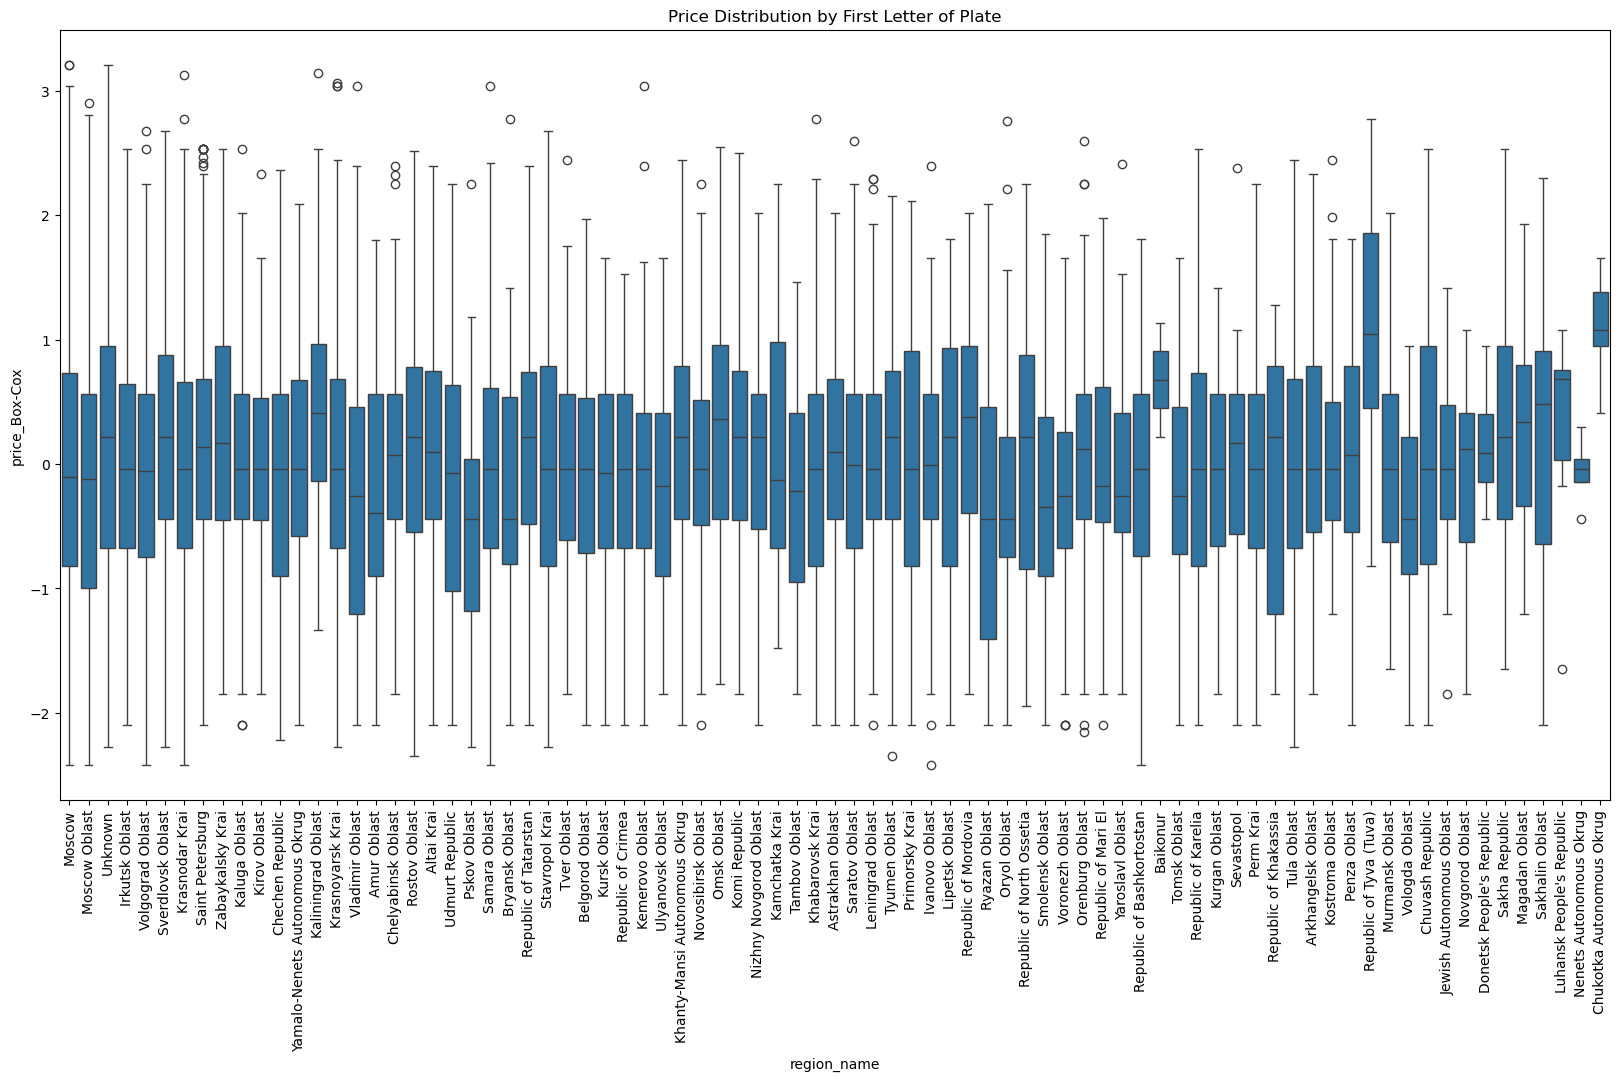

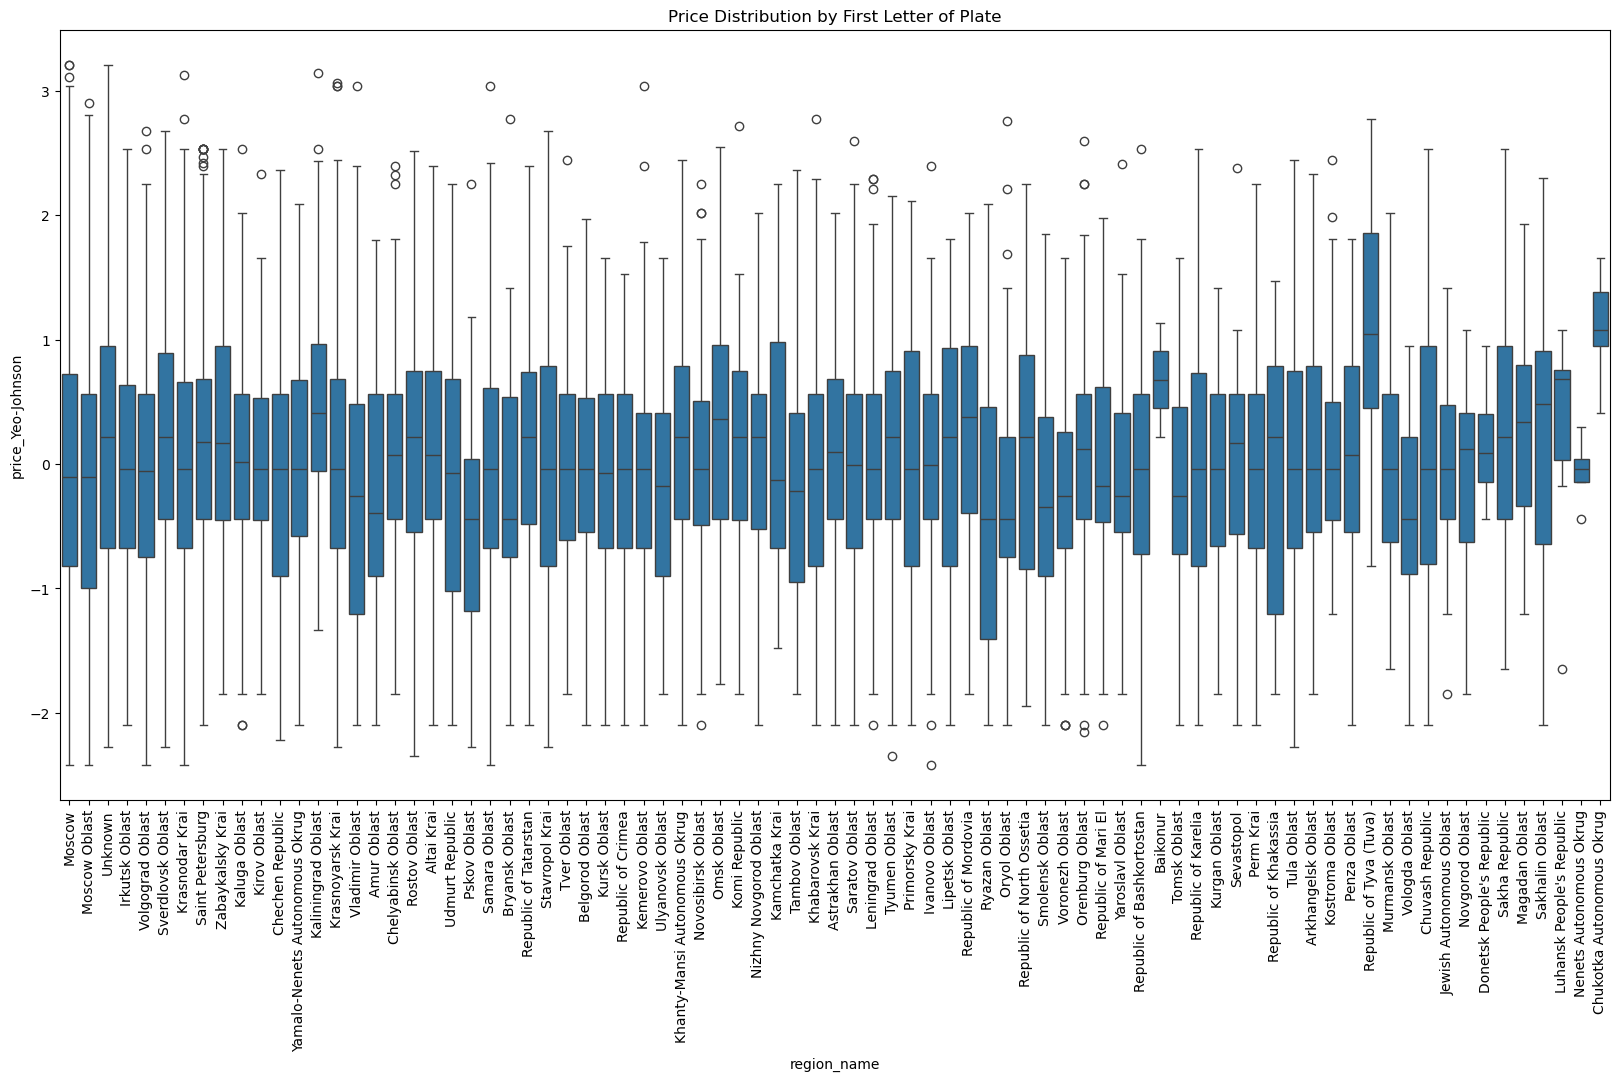

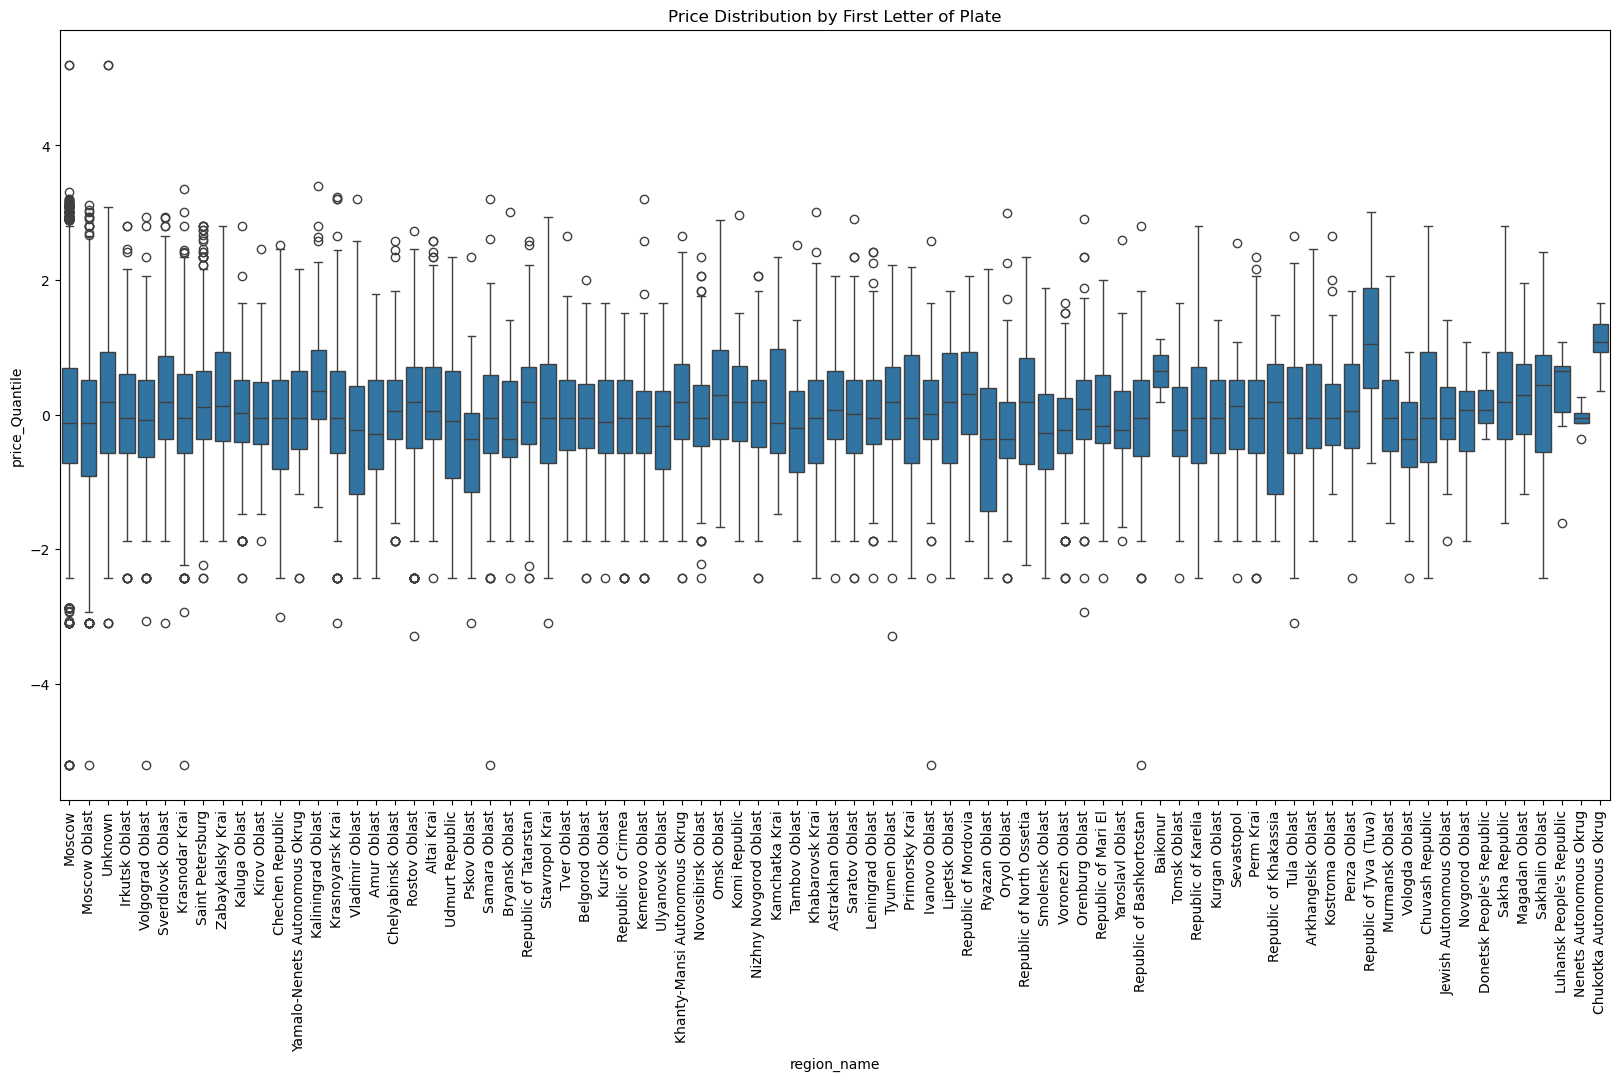

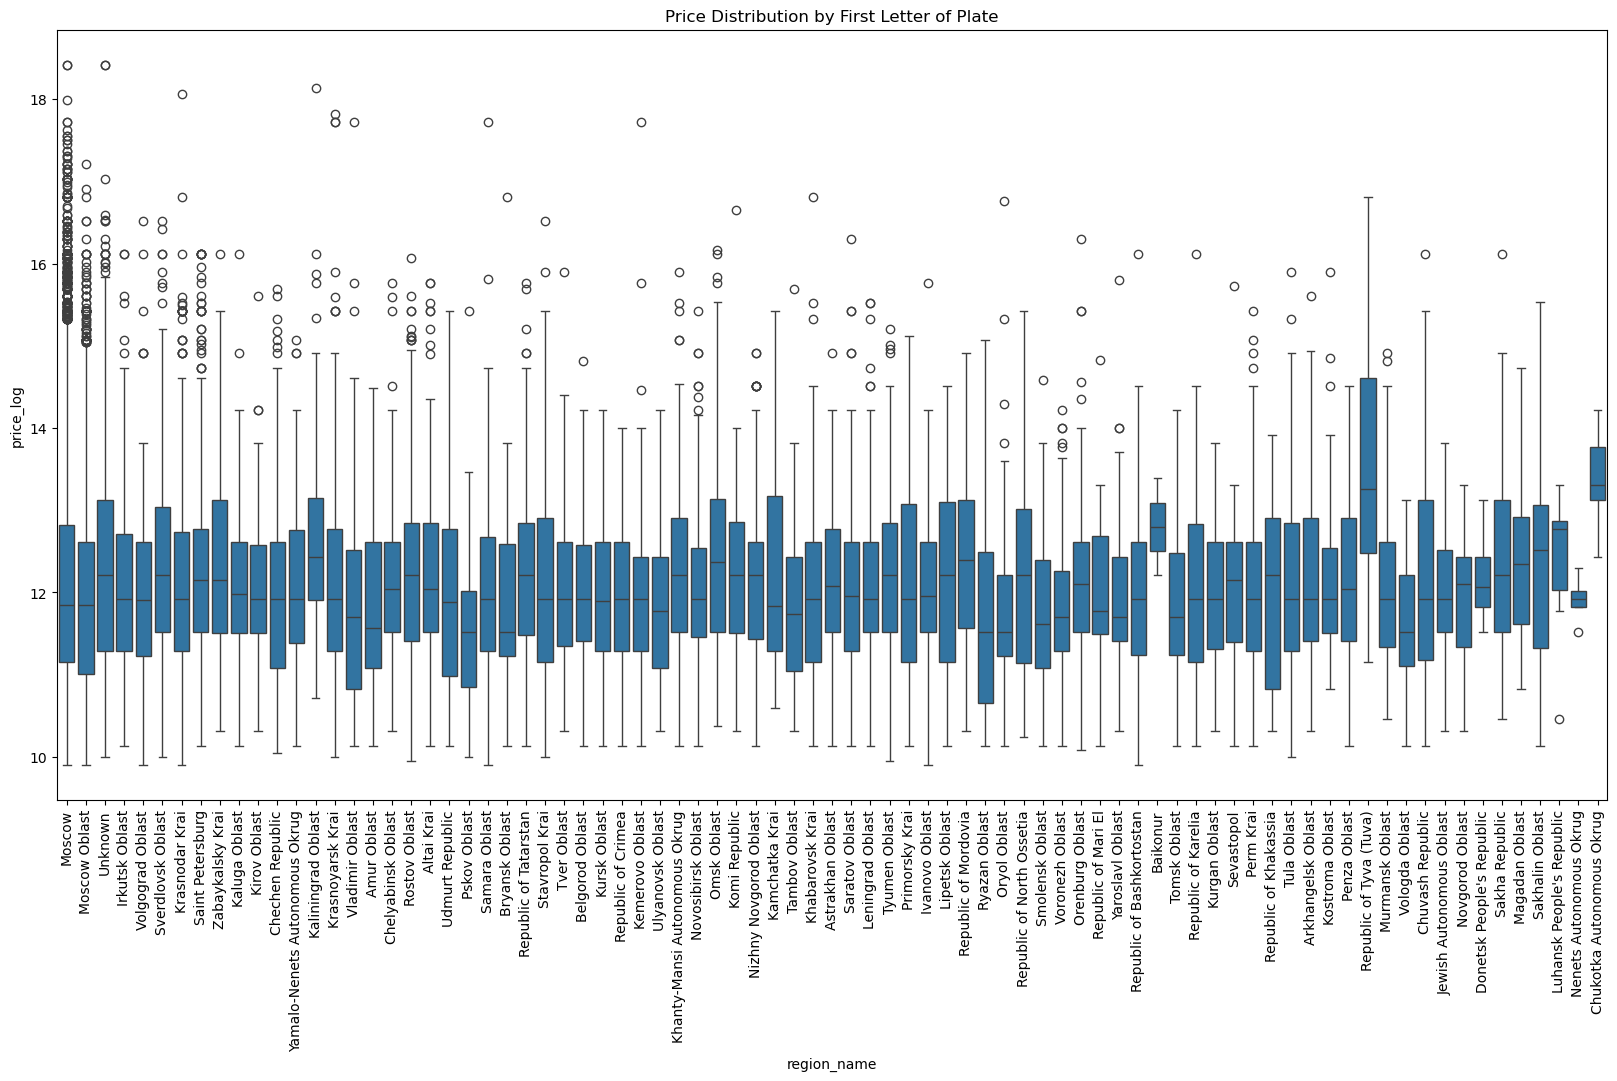

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column:         
        plt.figure(figsize=(20,10))
        sns.boxplot(x='region_name', y=transformed_column, data=df)
        plt.xticks(rotation=90)
        plt.title('Price Distribution by First Letter of Plate')
        plt.show()

In [39]:
df['region_avg_price'] = df.groupby("region")["price"].transform("mean") 

for transformed_column in df.columns:
    if 'price_' in transformed_column:
        name = transformed_column.split('_')[1]
        df[f'region_avg_{name}'] = df.groupby("region")[transformed_column].transform("mean")

df.describe()

,price,price_Box-Cox,price_Yeo-Johnson,price_Quantile,price_log,plate_length,region_avg_price,region_avg_Box-Cox,region_avg_Yeo-Johnson,region_avg_Quantile,region_avg_log
count,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000,43605.000000,4.360500e+04,43605.000000,43605.000000,43605.000000,43605.000000
mean,4.362646e+05,-0.065270,-0.066429,-0.061463,12.031245,8.695723,4.362646e+05,-0.065270,-0.066429,-0.061463,12.031245
std,1.842495e+06,1.006180,1.007075,1.010107,1.160217,0.460106,4.589789e+05,0.585009,0.583592,0.573168,0.660277
min,2.000000e+04,-2.416163,-2.416143,-5.199338,9.903538,8.000000,9.426799e+04,-0.843524,-0.842286,-0.826567,11.177729
25%,7.000000e+04,-0.820359,-0.820361,-0.718462,11.156265,8.000000,1.343982e+05,-0.651453,-0.651551,-0.627930,11.372634
50%,1.500000e+05,-0.042906,-0.042907,-0.051460,11.918397,9.000000,3.236328e+05,-0.025441,-0.023904,-0.029092,12.051332
75%,3.500000e+05,0.682227,0.682228,0.647177,12.765691,9.000000,6.311200e+05,0.474358,0.472501,0.467516,12.647330
max,1.000000e+08,3.211052,3.211027,5.199338,18.420681,9.000000,5.500050e+07,3.066479,3.066458,3.238769,17.822853


In [41]:
def digit_symmetry(plate):
    registration = plate[1:4]
    region = plate[6:]
    nums = registration + region

    return int(nums == nums[::-1])

df['digit_symmetry'] = df['plate'].apply(digit_symmetry)

In [43]:
df['registration_symmetry'] = df['registration_code'].apply(lambda x: int(x == x[::-1]))

In [45]:
df['region_symmetry'] = df['region'].apply(lambda x: int(x == x[::-1]))

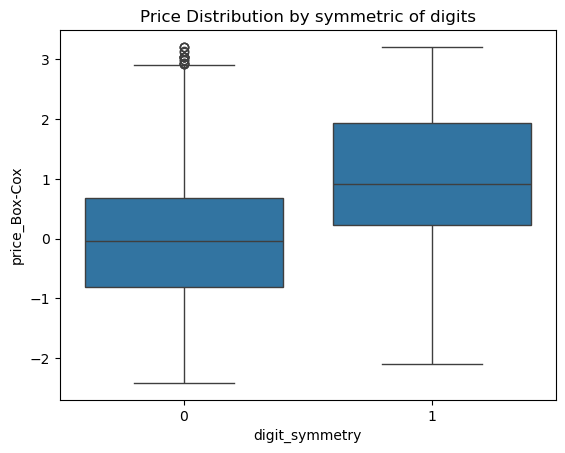

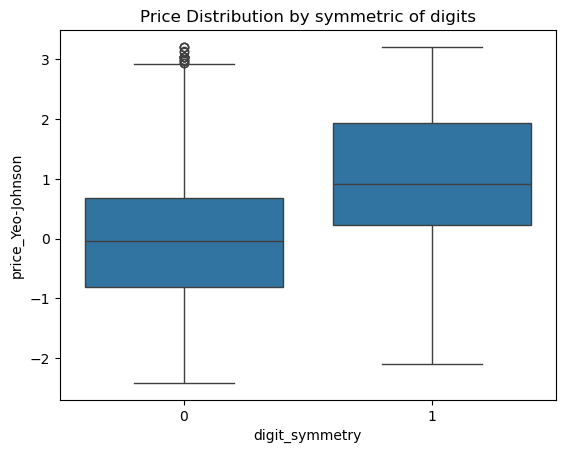

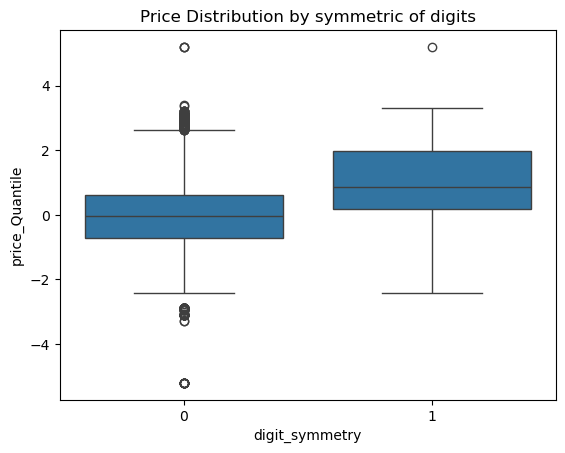

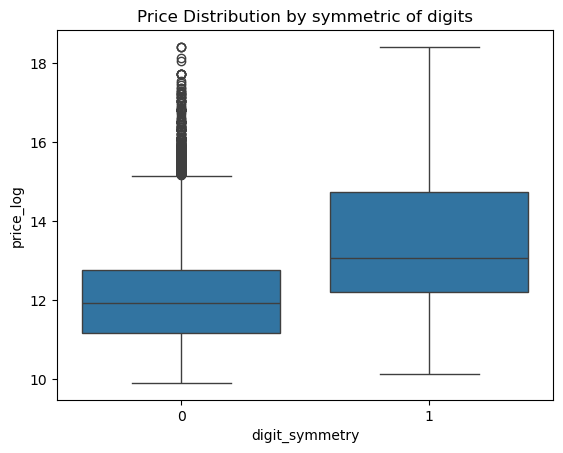

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        sns.boxplot(x='digit_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of digits')
        plt.show()

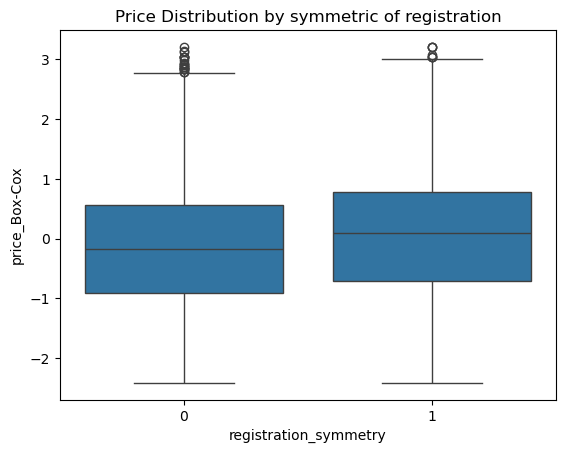

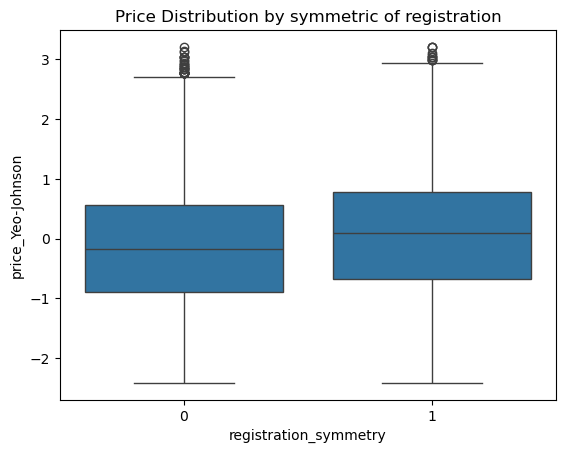

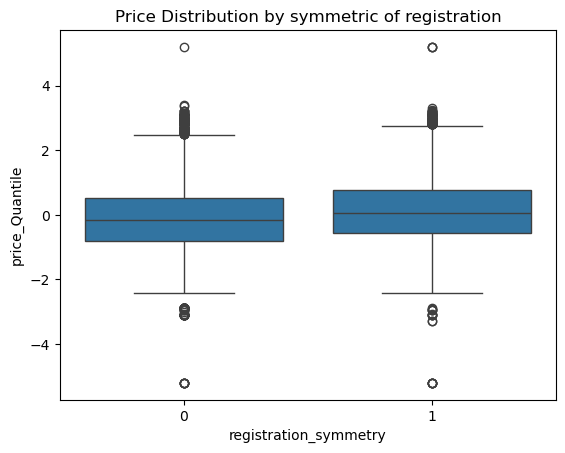

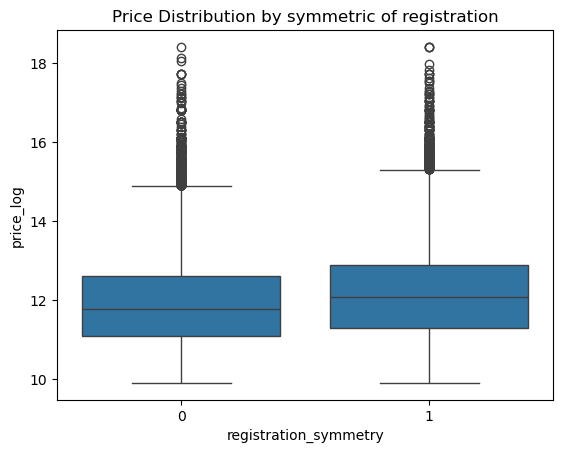

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='registration_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of registration')
        plt.show()

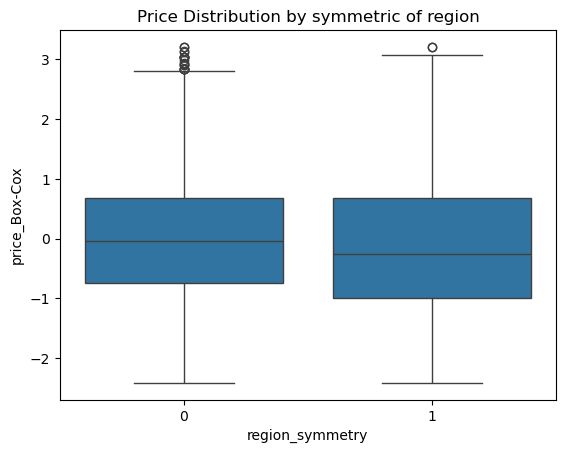

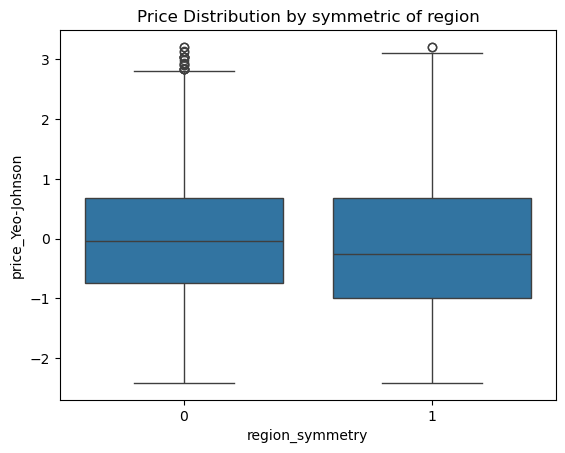

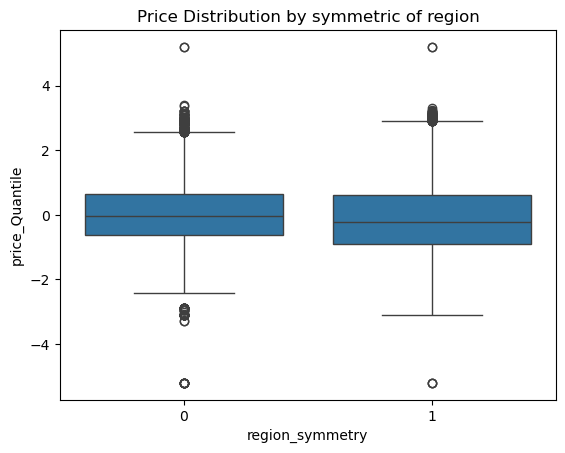

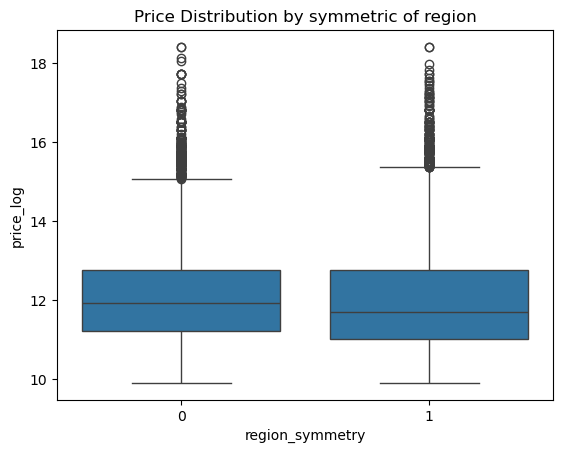

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='region_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by symmetric of region')
        plt.show()

In [53]:
from collections import Counter


def frequency_score(num_str):
    counts = Counter(num_str)
    max_freq = max(counts.values())
    return round(max_freq / len(num_str), 2)

def frequency_score_plate(plate):
    registration = plate[1:4]
    region = plate[6:]
    digits = registration + region
    
    counts = Counter(digits)
    max_freq = max(counts.values())
    return round(max_freq / len(digits), 2)

In [55]:
df['digits_frequency'] = df['plate'].apply(frequency_score_plate)
df['region_frequency'] = df['region'].apply(frequency_score)
df['registration_frequency'] = df['registration_code'].apply(frequency_score) 

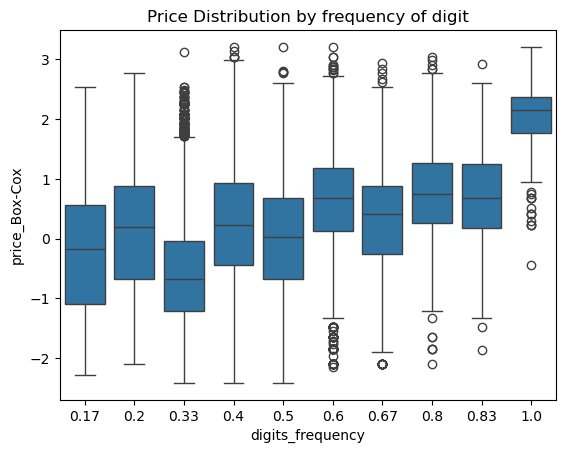

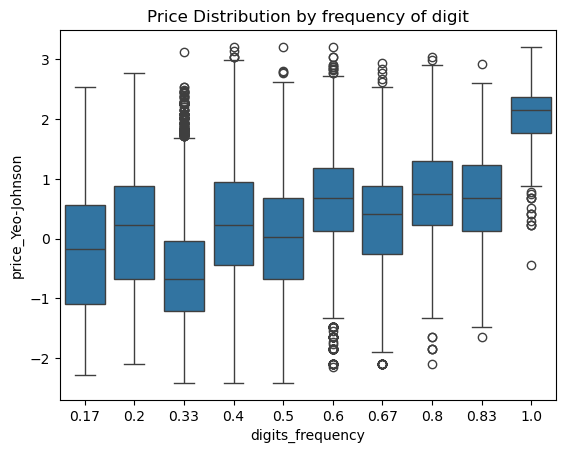

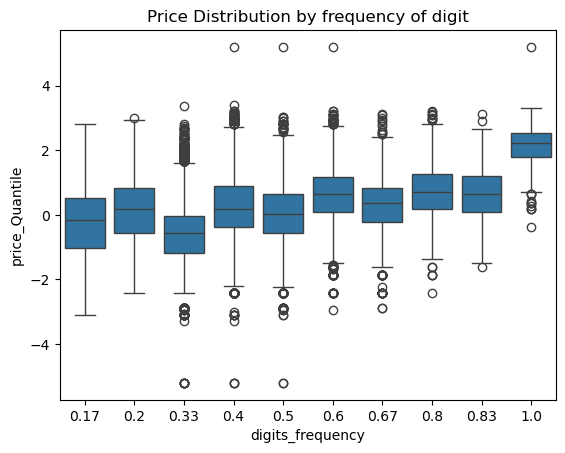

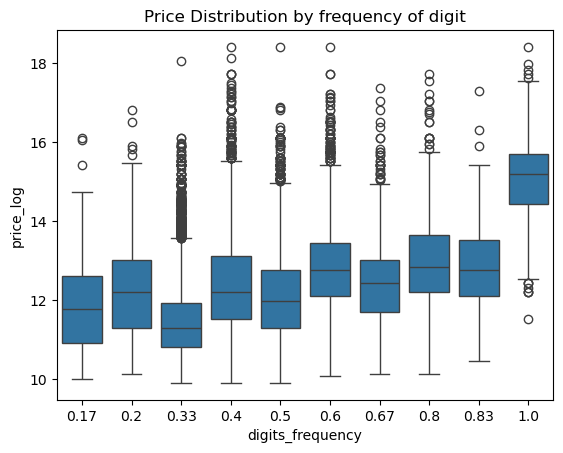

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='digits_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of digit')
        
        plt.show()

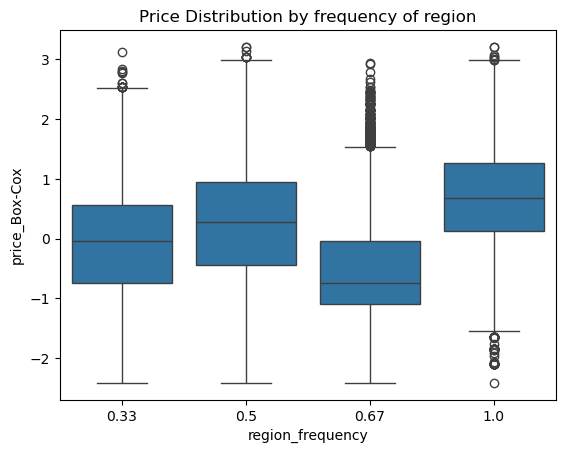

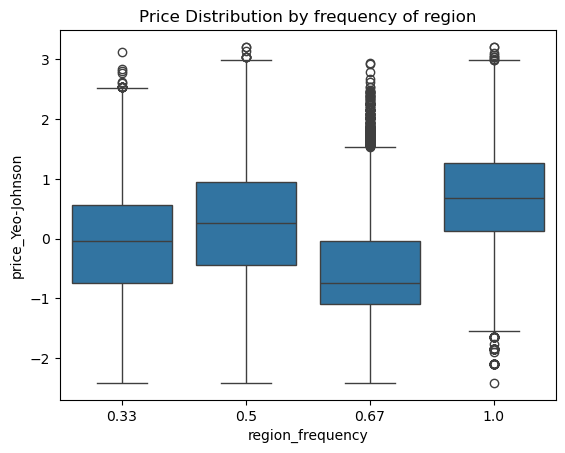

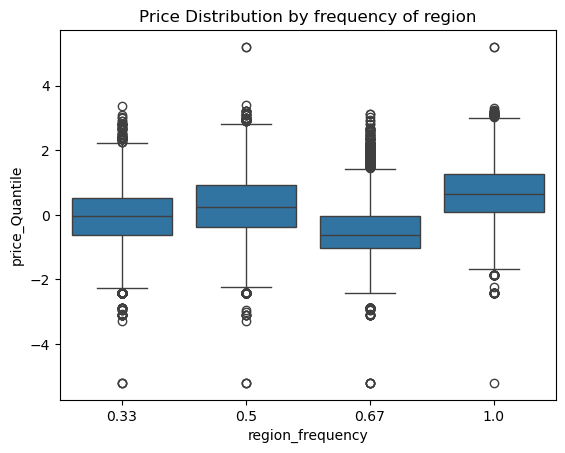

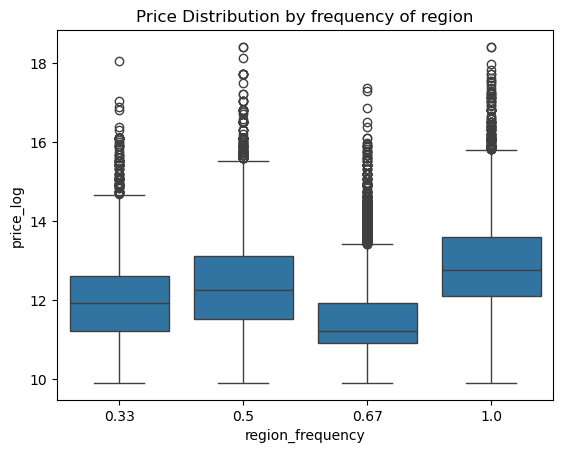

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='region_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of region')
        
        plt.show()

In [61]:
df['registration_frequency'].describe()

count    43605.000000
mean         0.624209
std          0.216875
min          0.330000
25%          0.330000
50%          0.670000
75%          0.670000
max          1.000000
Name: registration_frequency, dtype: float64

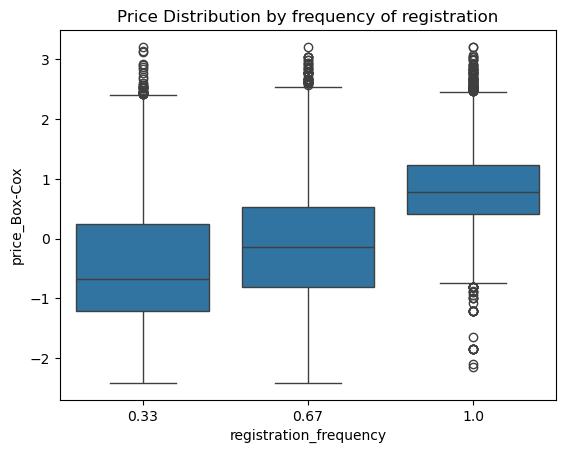

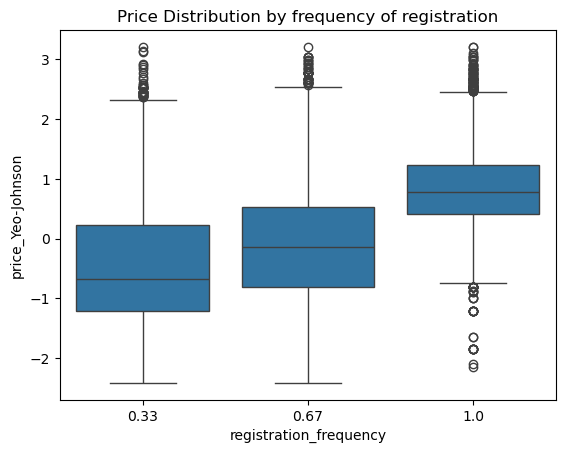

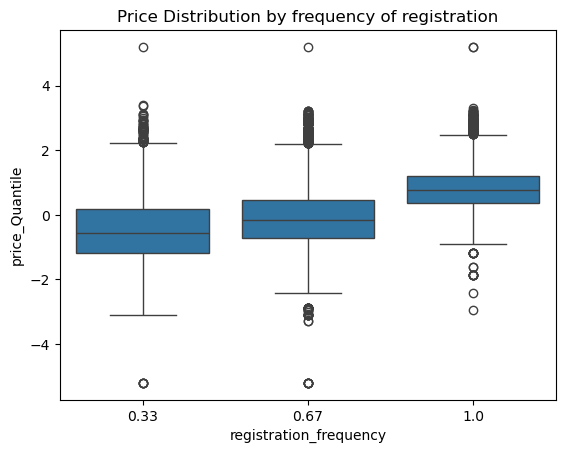

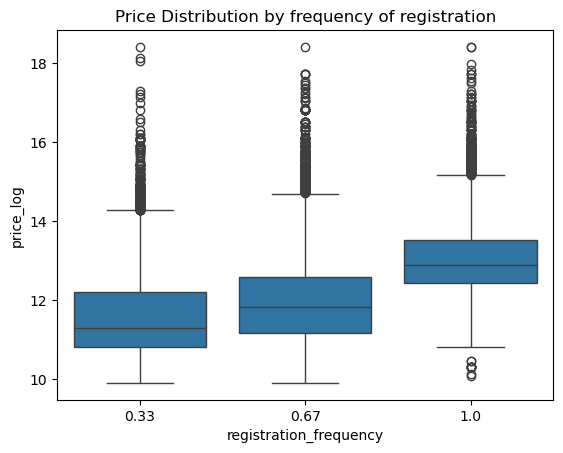

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        sns.boxplot(x='registration_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

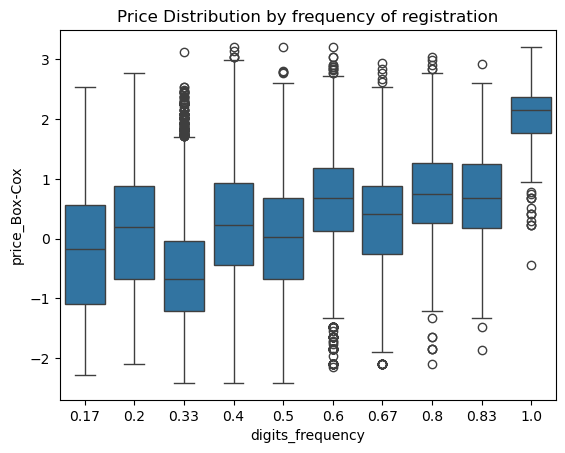

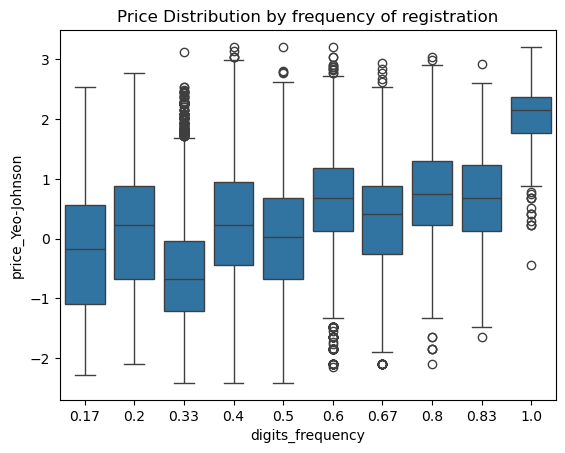

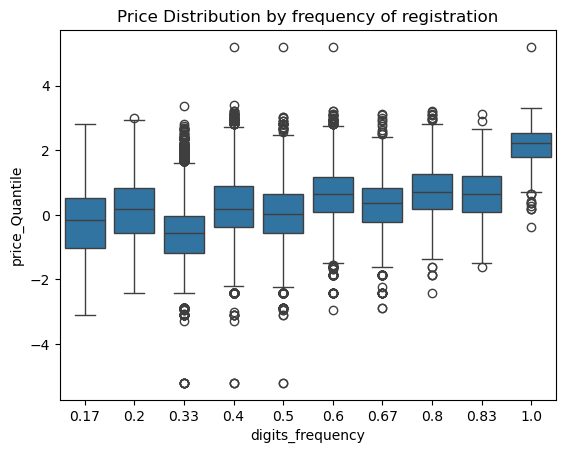

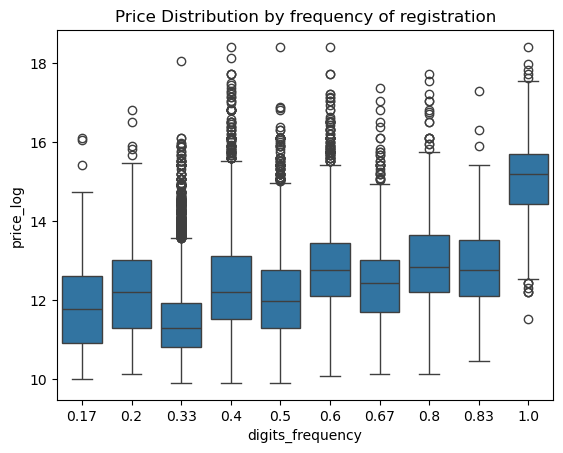

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker



for transformed_column in df.columns:
    if 'price_' in transformed_column:         
        sns.boxplot(x='digits_frequency', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

In [69]:
df['series_symmetry'] = df['series'].apply(lambda x: int(x == x[::-1]))

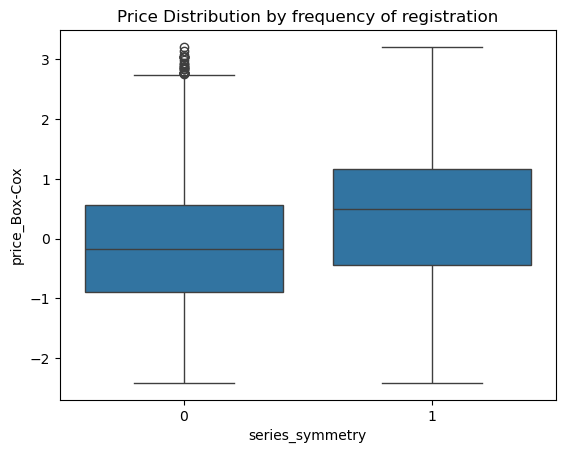

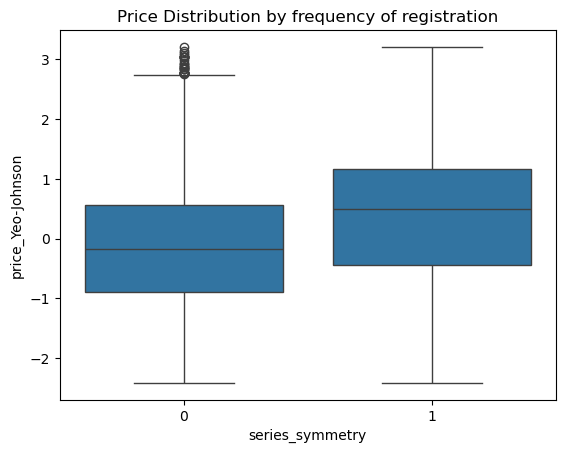

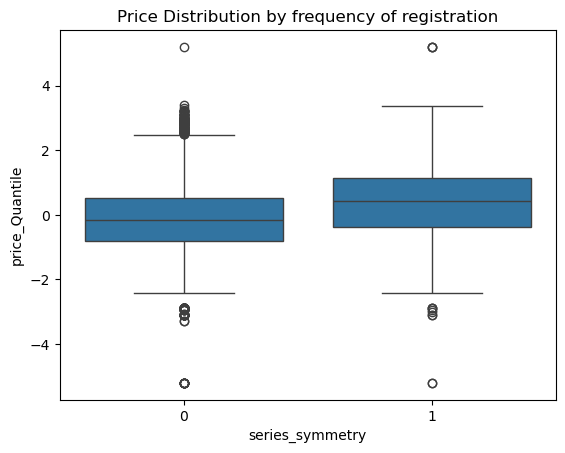

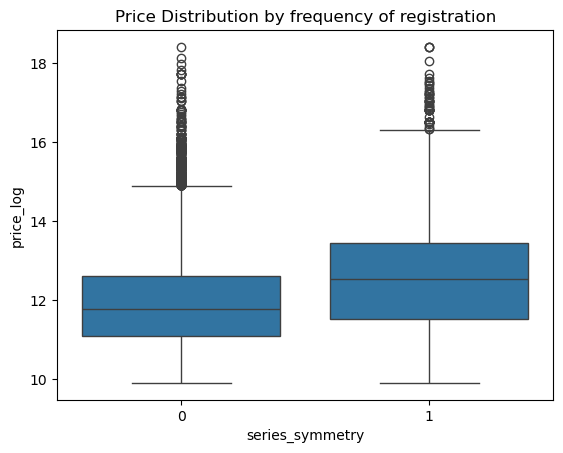

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        sns.boxplot(x='series_symmetry', y=transformed_column, data=df)
        plt.title('Price Distribution by frequency of registration')
        
        plt.show()

In [73]:
import pandas as pd
import scipy.stats as stats


for transformed_column in df.columns:
    if 'price_' in transformed_column:  
        groups = [group[transformed_column].values for _, group in df.groupby("series_symmetry")]
        
        h_stat, p_value = stats.kruskal(*groups)
        print(f"Kruskal-Wallis H-statistic for {transformed_column}: {h_stat}, p-value: {p_value}")

Kruskal-Wallis H-statistic for price_Box-Cox: 1801.8665978004367, p-value: 0.0
Kruskal-Wallis H-statistic for price_Yeo-Johnson: 1789.8088894380505, p-value: 0.0
Kruskal-Wallis H-statistic for price_Quantile: 1789.8088894380505, p-value: 0.0
Kruskal-Wallis H-statistic for price_log: 1789.8088894380505, p-value: 0.0


In [75]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek

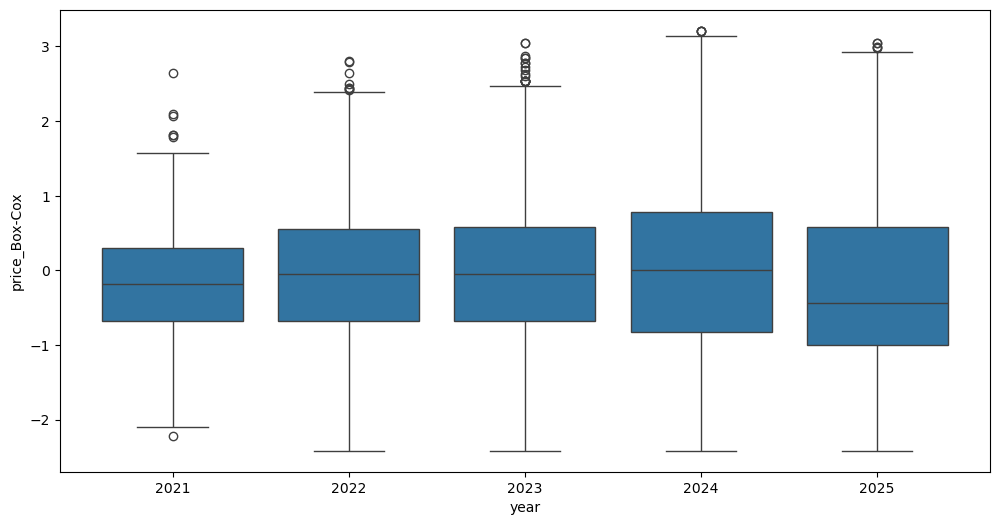

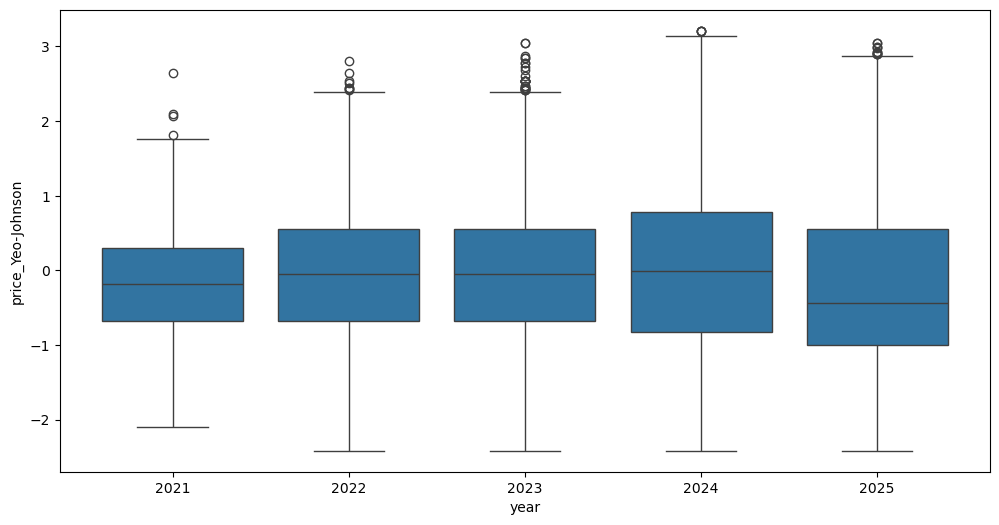

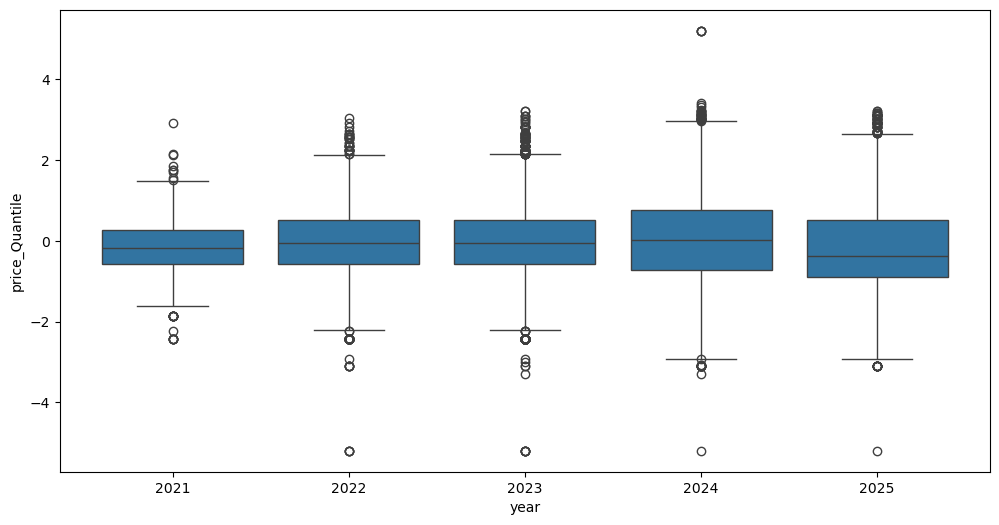

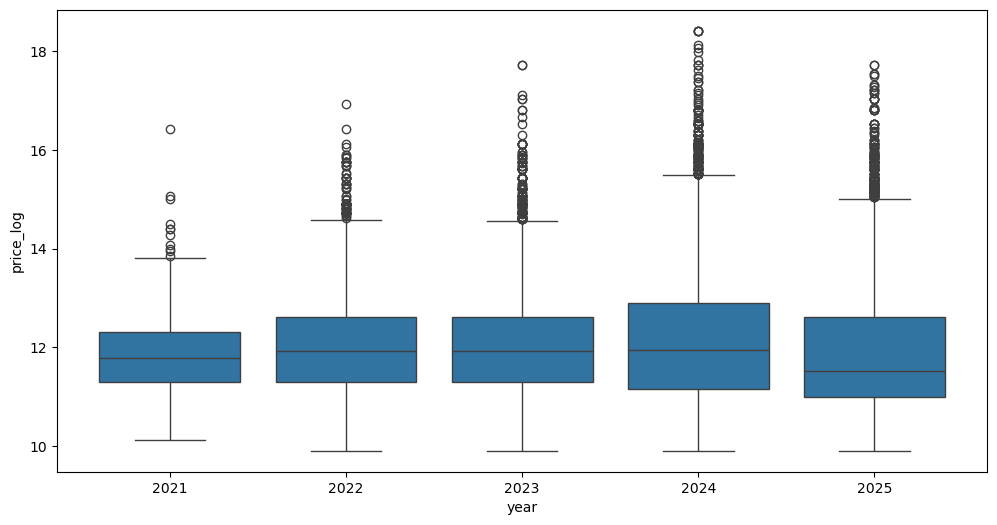

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt



for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(12, 6))
        sns.boxplot(
            data=df,
            x='year',
            y=transformed_column
        )
        plt.plot()

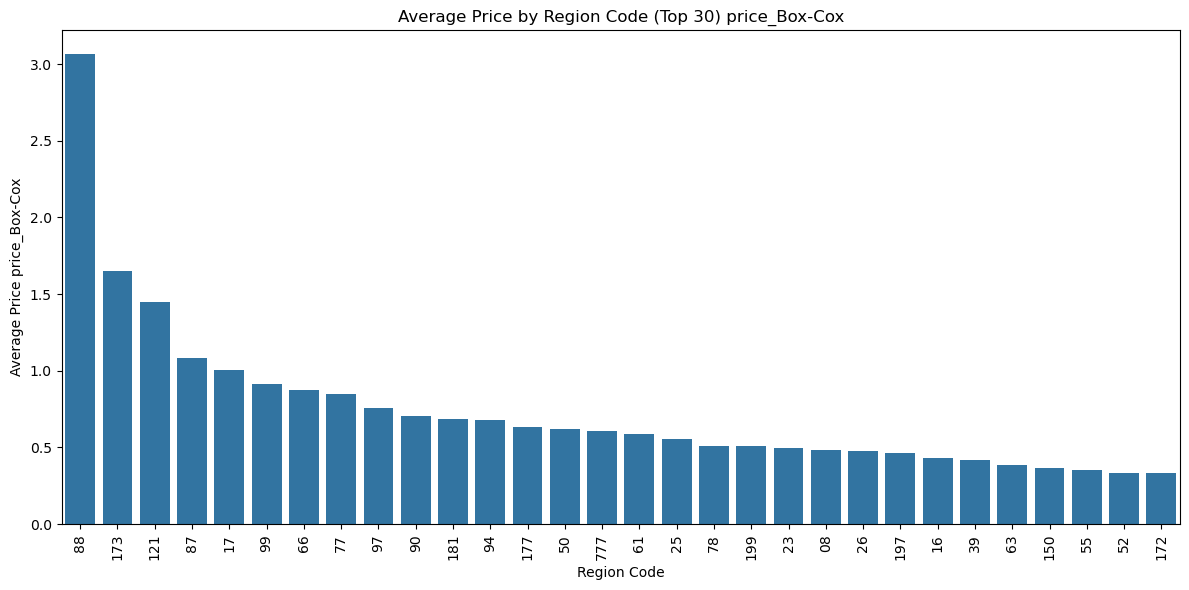

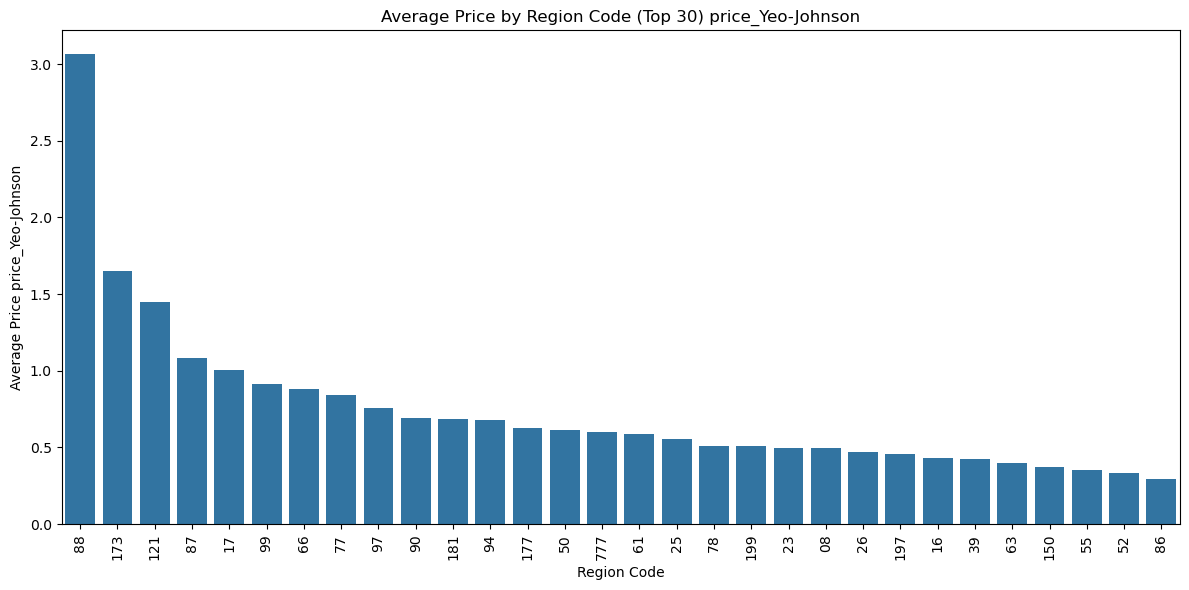

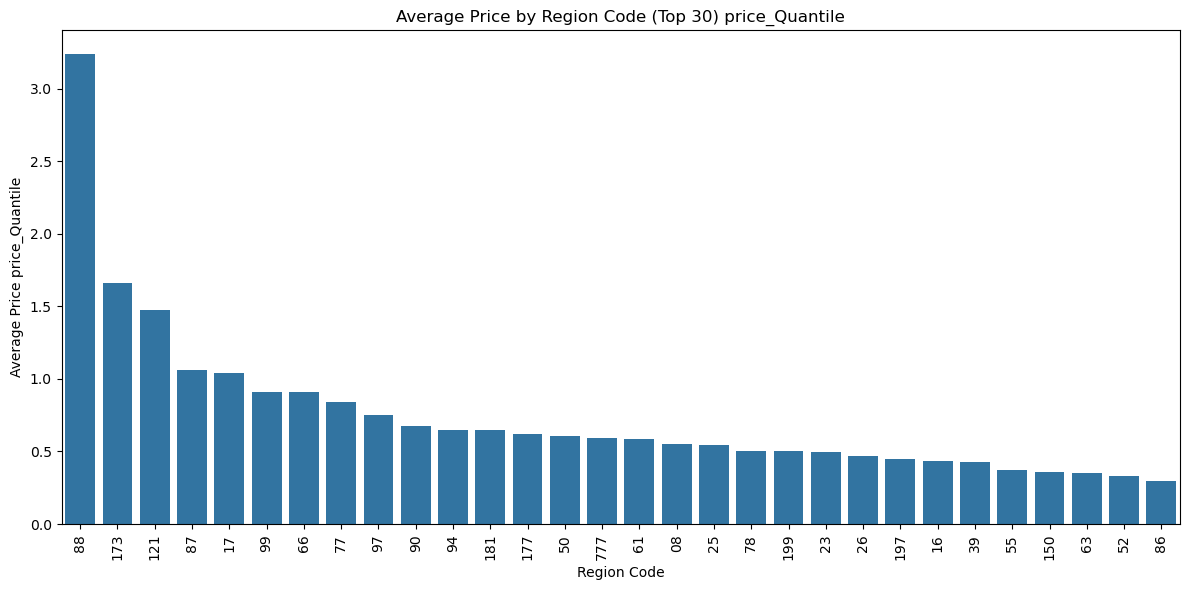

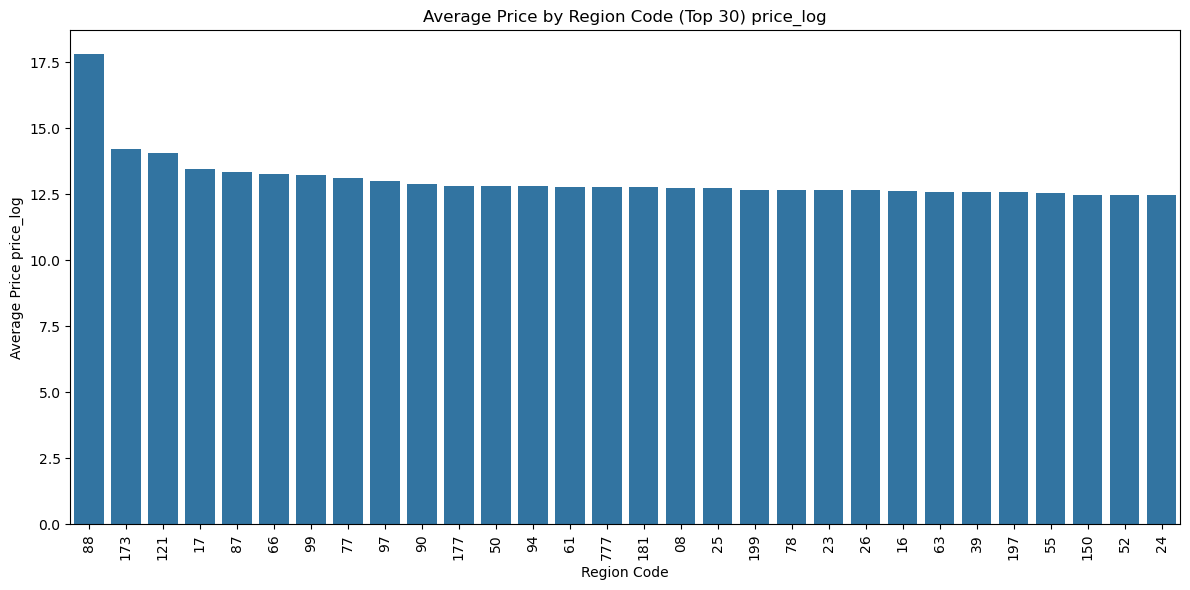

In [79]:
for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(12, 6))
        region_avg_price = df.groupby('region')[transformed_column].mean().sort_values(ascending=False).head(30)
        sns.barplot(x=region_avg_price.index, y=region_avg_price.values)
        plt.title(f'Average Price by Region Code (Top 30) {transformed_column}')
        plt.xticks(rotation=90)
        plt.xlabel('Region Code')
        plt.ylabel(f'Average Price {transformed_column}')
        plt.tight_layout()
        plt.show()

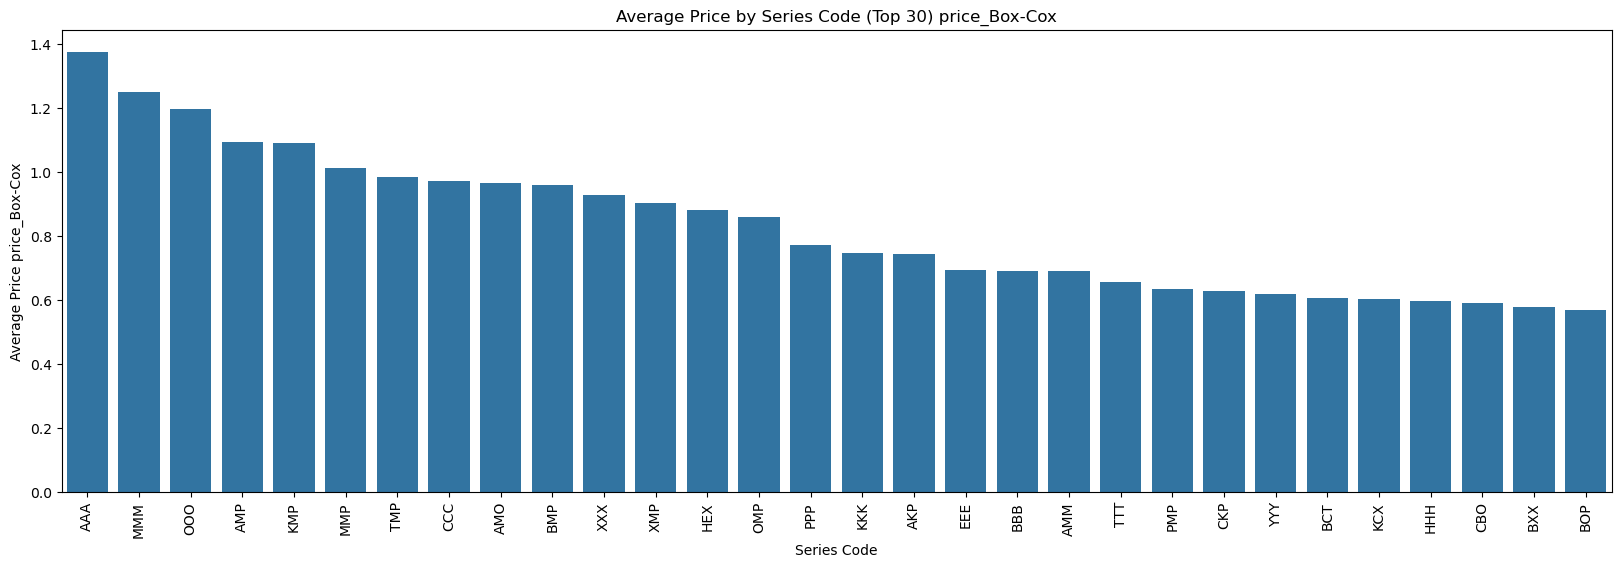

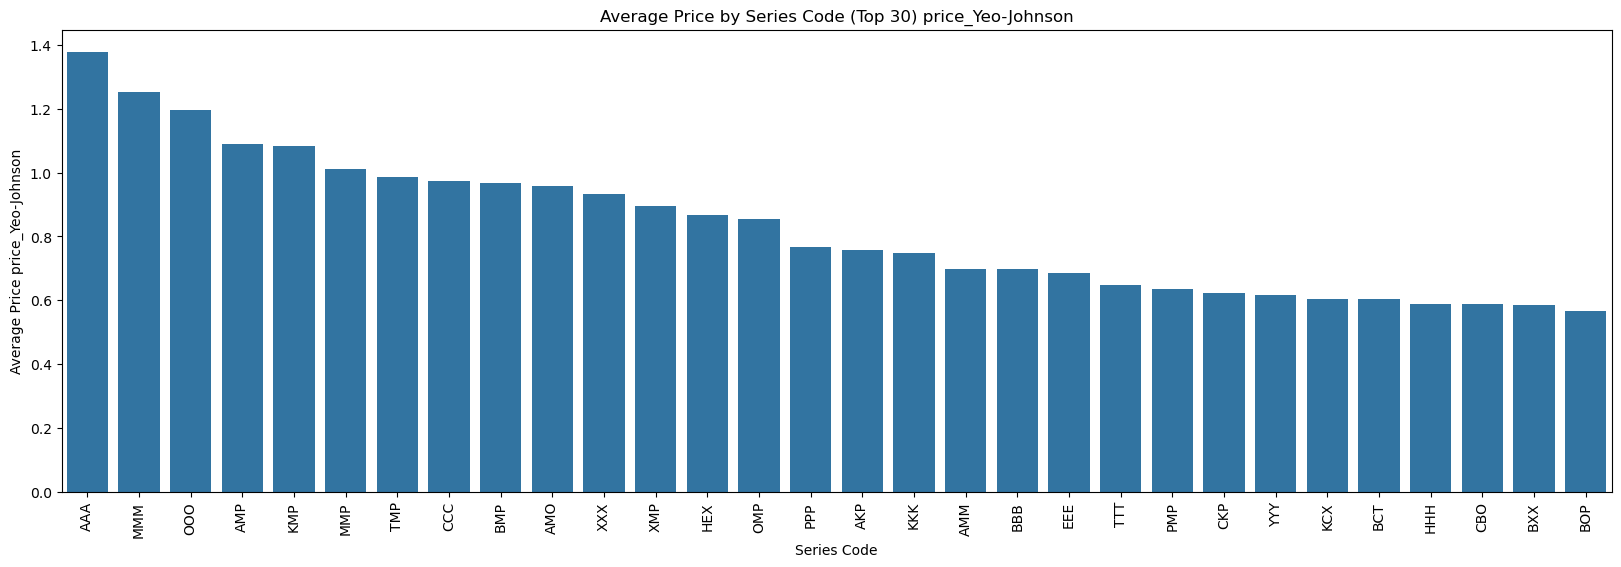

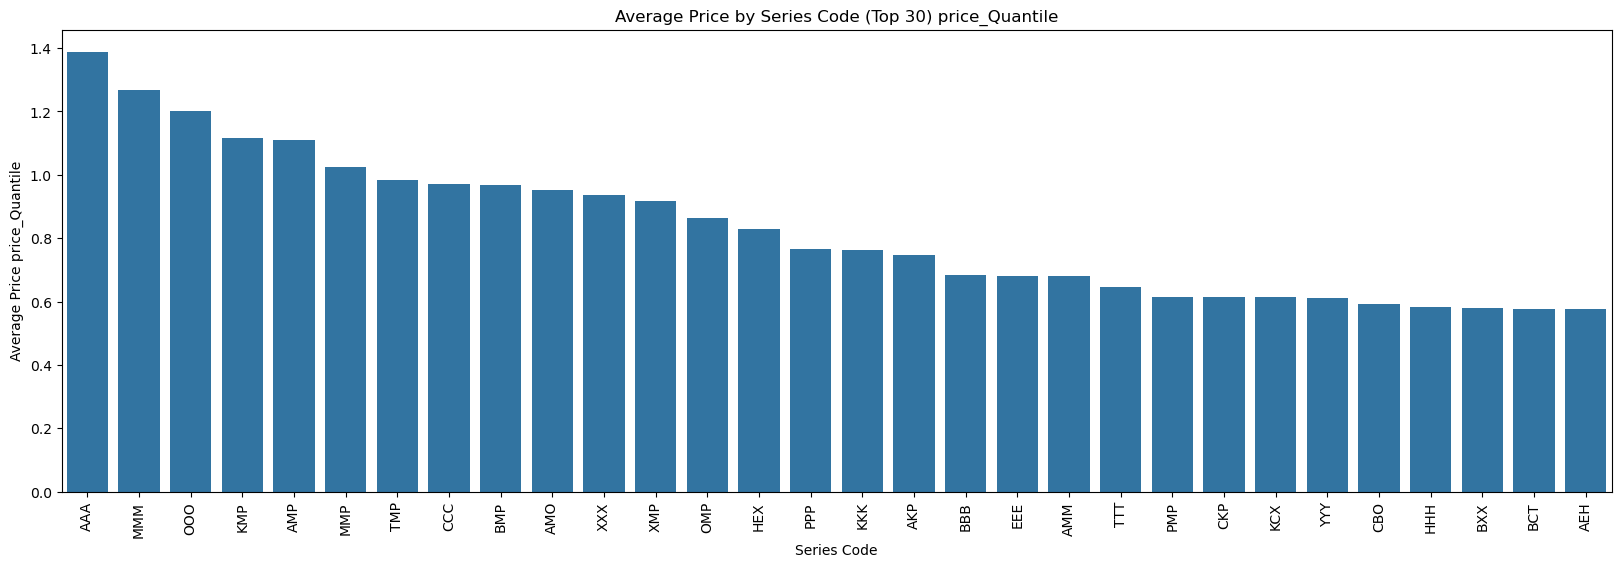

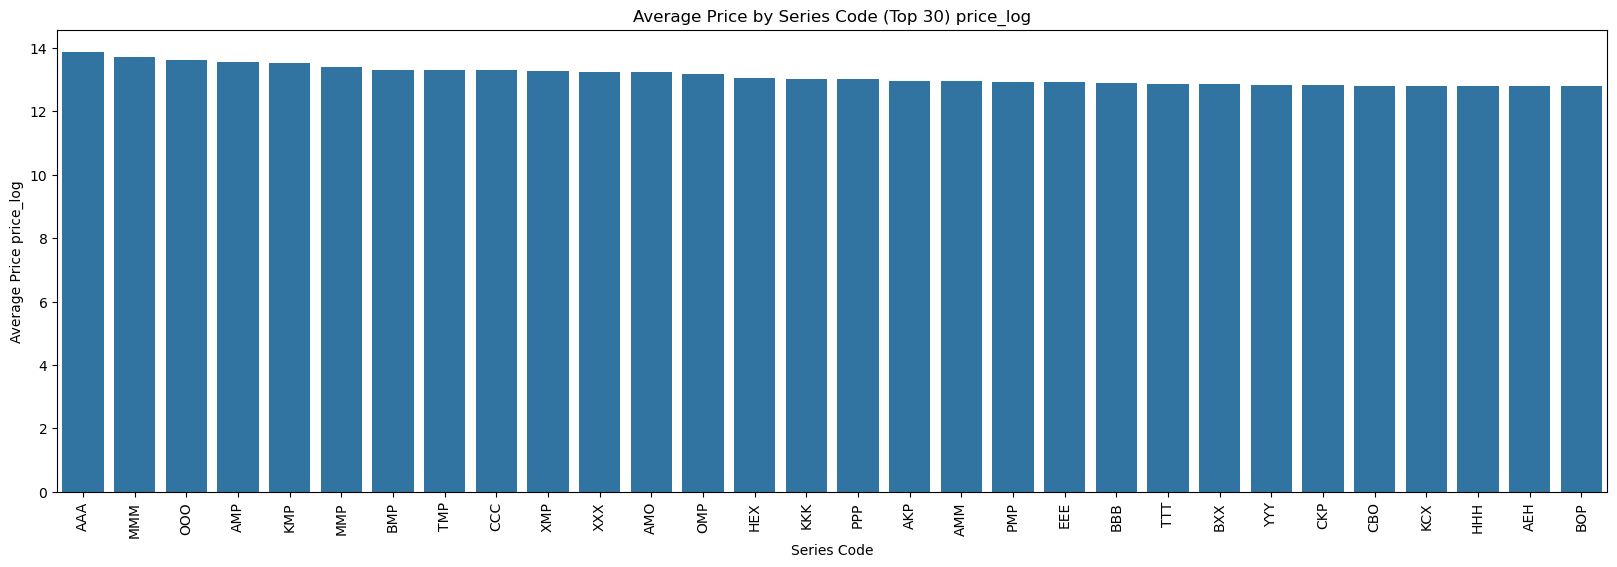

In [81]:
for transformed_column in df.columns:
    if 'price_' in transformed_column: 
        plt.figure(figsize=(20, 6))
        series_avg_price = df.groupby('series')[transformed_column].mean().sort_values(ascending=False).head(30)
        plt.title(f'Average Price by Series Code (Top 30) {transformed_column}')
        plt.xticks(rotation=90)
        plt.xlabel('Series Code')
        plt.ylabel(f'Average Price {transformed_column}')
        sns.barplot(x = series_avg_price.index, y=series_avg_price.values)

In [111]:
prestigious_numbers = [1, 2, 3, 4, 5, 6, 7, 8, 9, 111, 222, 333, 444, 555, 666, 777, 888, 999,
                       100, 200, 300, 400, 500, 600, 700, 800, 900]
prestigious_letter_series = ["AAA", "MMM", "EEE", "KKK", "OOO", "PPP", "CCC", "TTT", "XXX"]

df["is_prestigious_number"] = df["registration_code"].apply(lambda x: 1 if int(x) in prestigious_numbers else 0)
df["is_prestigious_letter"] = df["series"].apply(lambda x: 1 if x in prestigious_letter_series else 0)

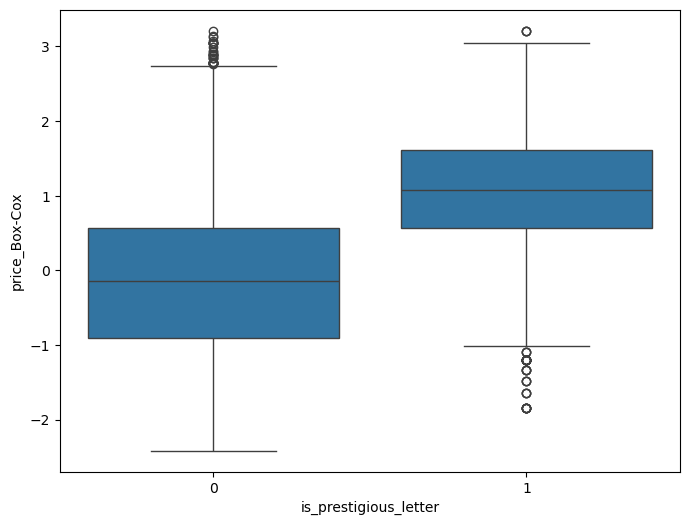

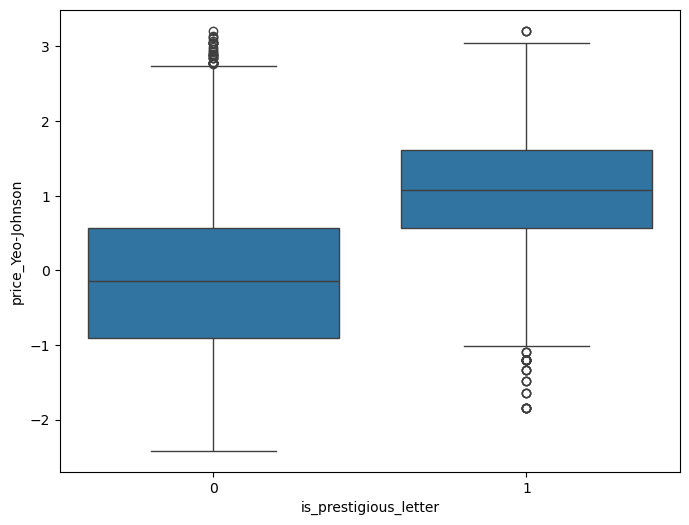

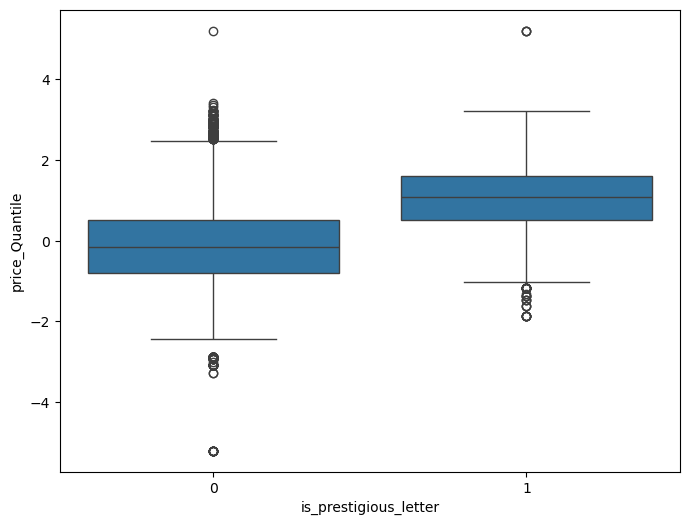

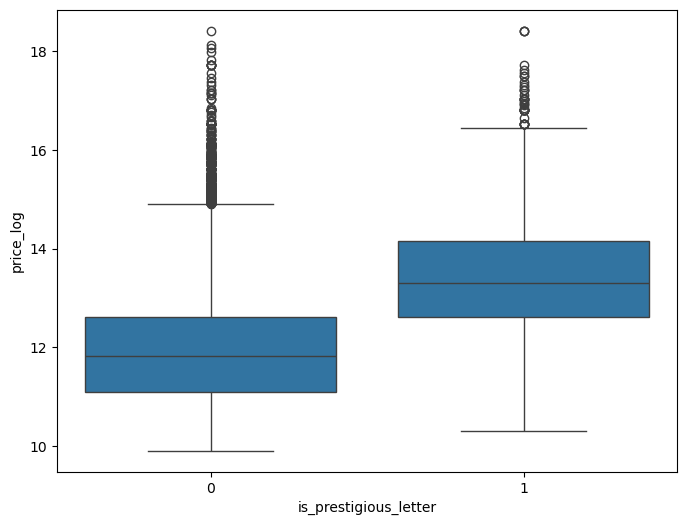

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        plt.figure(figsize=(8,6))
        sns.boxplot(
            data=df,
            x="is_prestigious_letter",
            y=transformed_column
        )
        plt.plot()

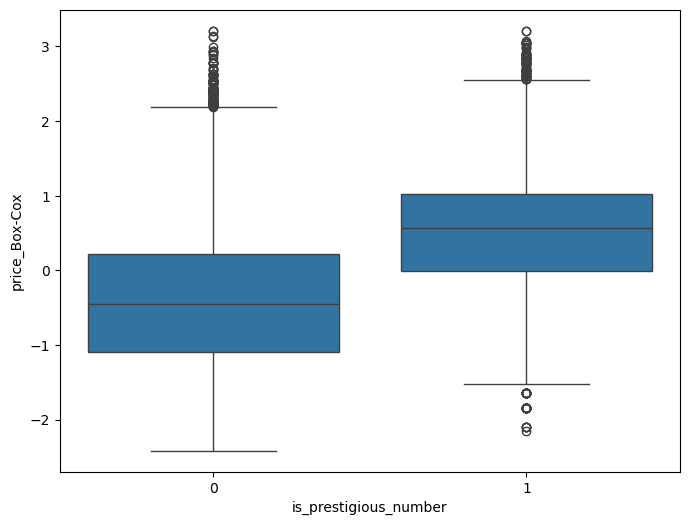

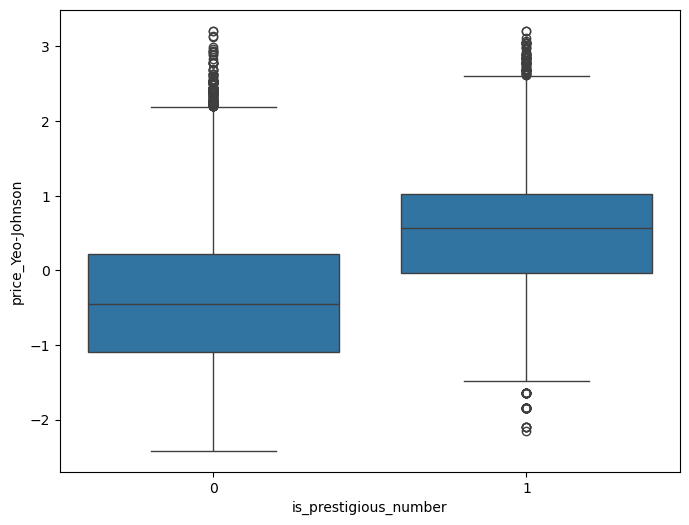

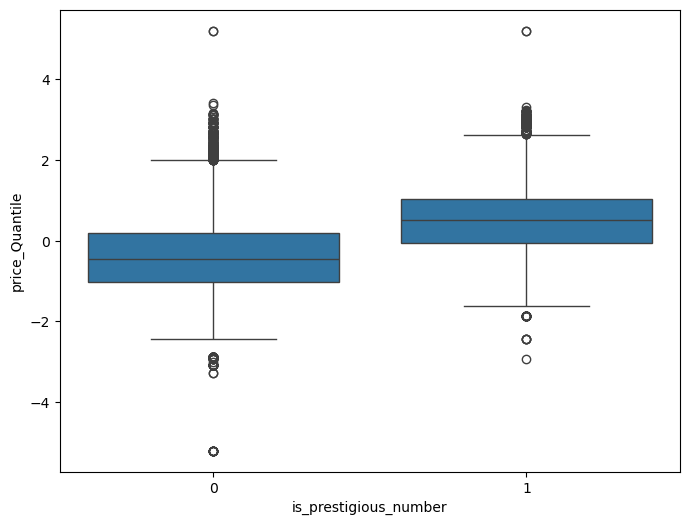

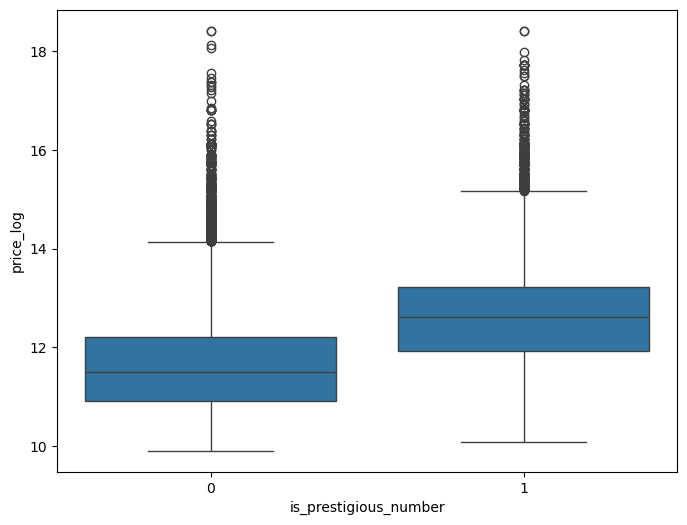

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        plt.figure(figsize=(8,6))
        sns.boxplot(
            data=df,
            x="is_prestigious_number",
            y=transformed_column
        )
        plt.plot()

<Axes: >

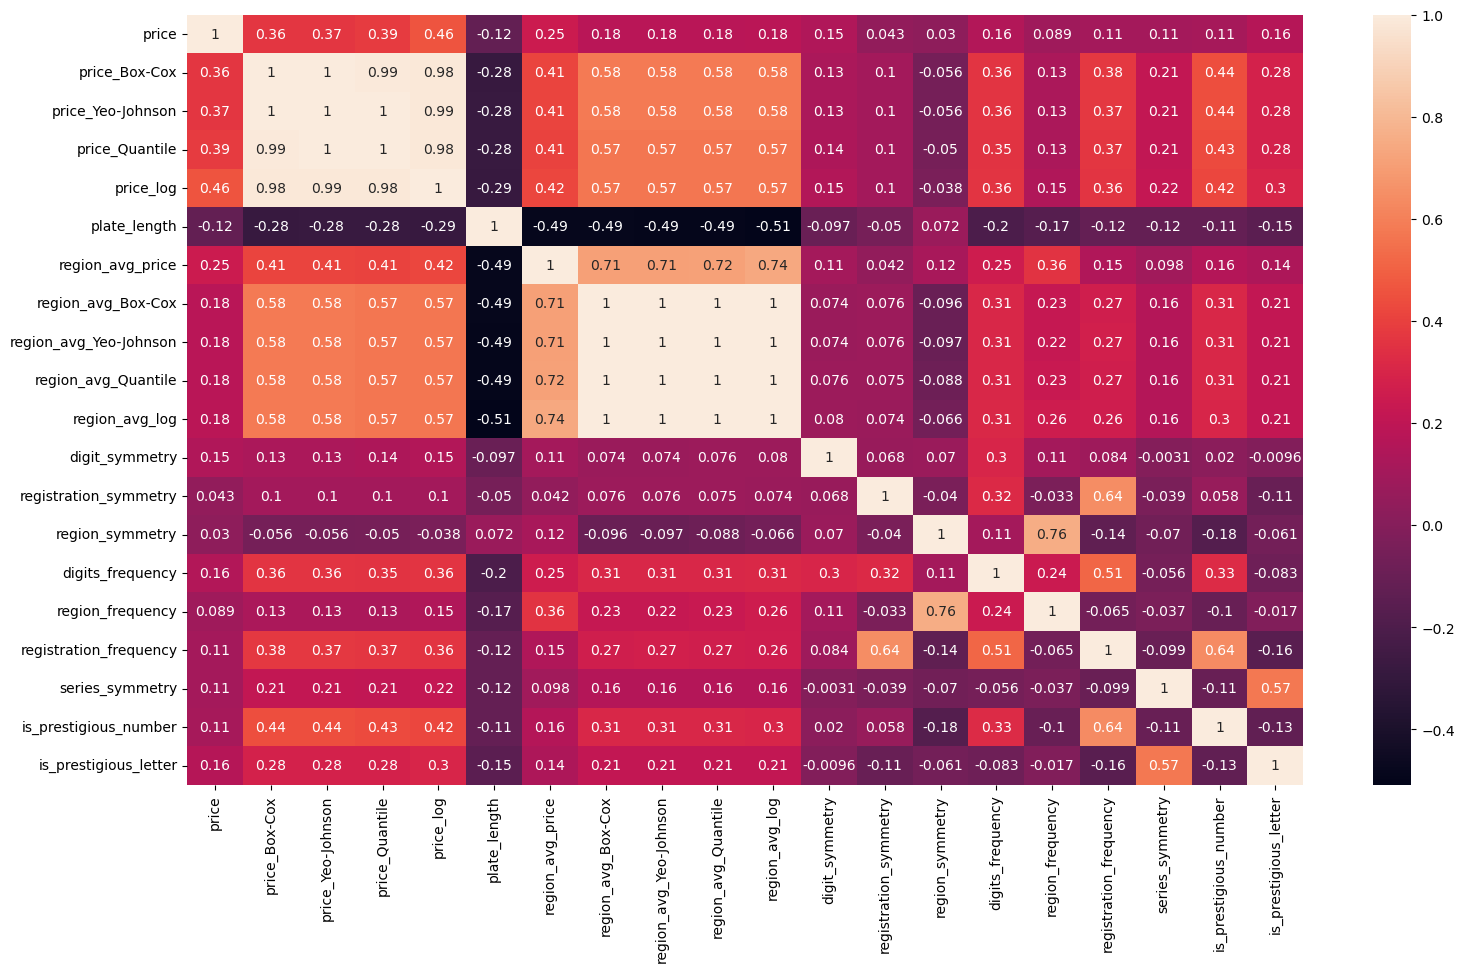

In [121]:
import seaborn as sns

plt.figure(figsize=(18, 10))
corr = df.select_dtypes(['int64', 'float64']).corr(method='pearson')
sns.heatmap(corr, annot=True)

<Axes: >

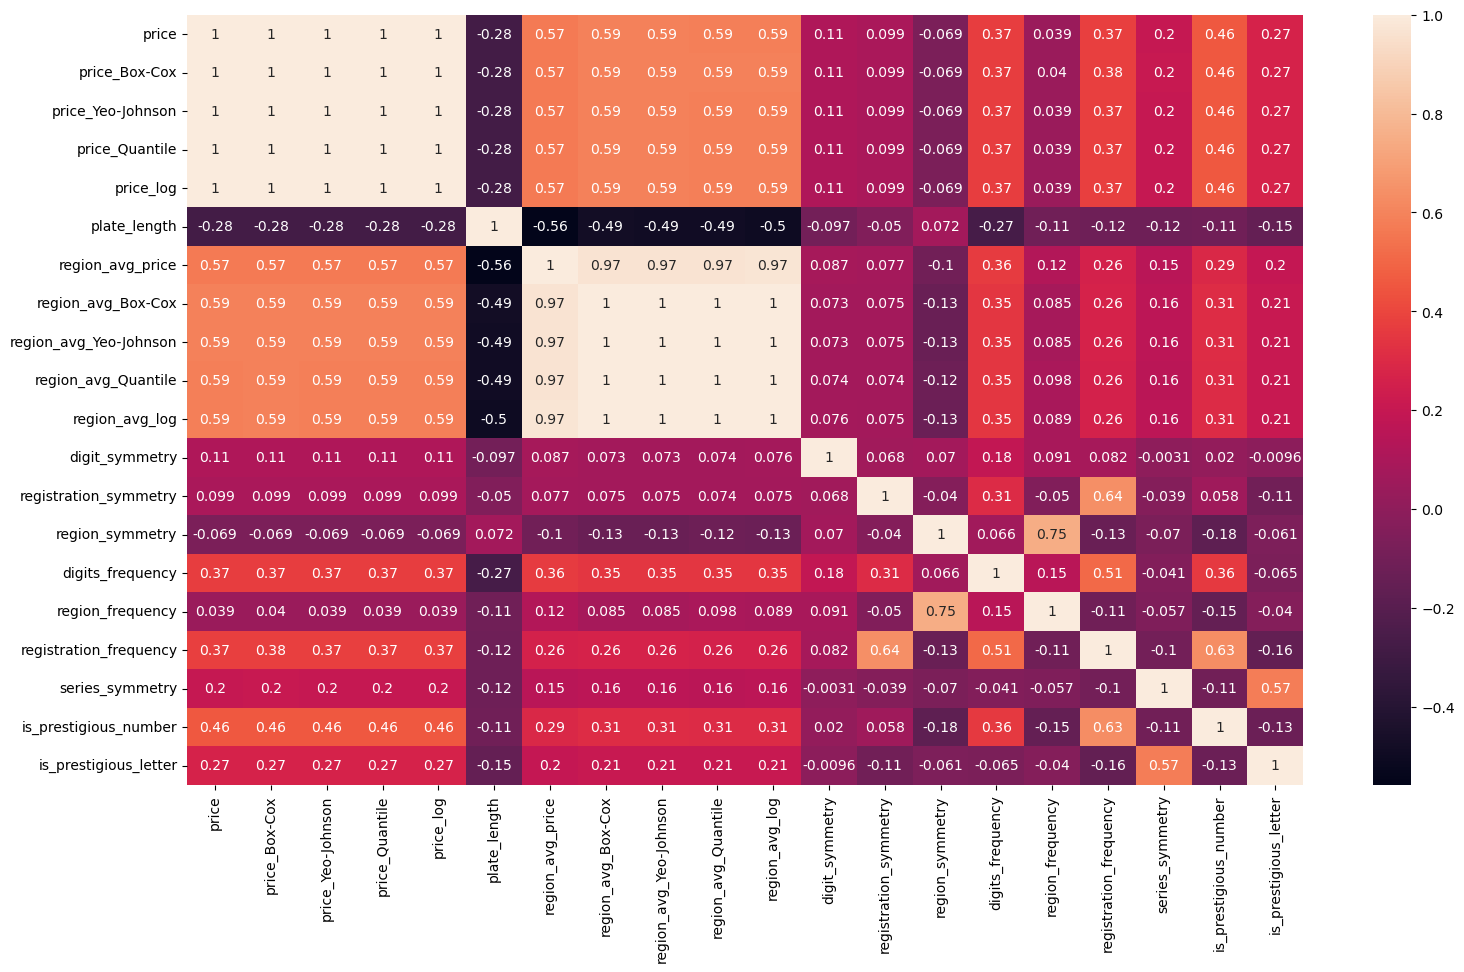

In [123]:
import seaborn as sns

plt.figure(figsize=(18, 10))
corr = df.select_dtypes(['int64', 'float64']).corr(method='spearman')
sns.heatmap(corr, annot=True)

## Encoding

In [75]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [78]:
encoded_array = encoder.fit_transform(df[['series_part_1']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['series_part_1']))

df = pd.concat([df.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

In [80]:
encoded_array = encoder.fit_transform(df[['series_part_2']])

df_encoded = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['series_part_2']))

df = pd.concat([df.reset_index(drop=True), df_encoded.reset_index(drop=True)], axis=1)

# Model Implementation

## LightGBM

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz

# Custom SMAPE function
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    # Avoid division by zero issues:
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Custom metric for LightGBM (returns tuple: (eval_name, eval_result, is_higher_better))
def lgb_smape(y_pred, dataset):
    y_true = dataset.get_label()
    return 'SMAPE', smape(y_true, y_pred), False

def smape(actual, forecast):
    denominator = (np.abs(actual) + np.abs(forecast)) / 2.0
    diff = np.abs(actual - forecast) / denominator
    return 100 * np.mean(diff)

# Custom SMAPE evaluation
def smape_eval(y_pred, y_true):
    y_true = y_true.get_label()
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    return 'smape', 100 * np.mean(diff), False



# Assuming df is your DataFrame and 'price' is the target variable
features = [col for col in df.columns if col not in ['price', 'plate', 'date', 'price_transformed', 'series_part_1', 'series_part_2', 'series', 'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile', 'price_log']]
X = df[features].apply(pd.to_numeric)
models = {}


for name, transformer in transformers.items():
    y = df[f'price_{name}']
    
    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create LightGBM datasets
    train_data = lgb.Dataset(X_train, label=y_train)
    val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
    
    # Define parameters for LightGBM
    params = {
        'objective': 'regression',
        'metric': 'None',  # We use a custom evaluation metric
        'learning_rate': 0.05,
        'num_leaves': 31,
        'verbose': -1,
        'seed': 42
    }
    
    # Train the model without verbose_eval parameter
    model = lgb.train(
        params,
        train_data,
        num_boost_round=1000,
        valid_sets=[train_data, val_data],
        valid_names=['train', 'valid'],
        feval=smape_eval,
    )
    
    # Predict on validation set and calculate SMAPE
    #y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    #print("Validation SMAPE:", smape(y_val.values, y_pred))
    
    
    # Final SMAPE (on original scale)
    y_pred = model.predict(X_val)
    y_pred_original = transformer.inverse_transform(y_pred.reshape(-1, 1))
    y_val_original = transformer.inverse_transform(y_val.array.reshape(-1, 1))
    
    smape_score = smape(y_val_original.flatten(), y_pred_original.flatten())
    print(f"\nFinal SMAPE on validation set for {name}: {smape_score:.2f}%")
    models[name] = model
    
    # Generate a graph of the first tree using Graphviz
    tree_index = 0  # Change this to visualize other trees
    graph = lgb.create_tree_digraph(model, tree_index=tree_index)
    graph.render("lightgbm_tree", view=True)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Box-Cox: 40.83%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Yeo-Johnson: 40.97%


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(



Final SMAPE on validation set for Quantile: 40.96%


In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz

def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    # Avoid division by zero issues:
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def lgb_smape(y_pred, dataset):
    y_true = dataset.get_label()
    return 'SMAPE', smape(y_true, y_pred), False

features = [col for col in df.columns if col not in ['price', 'plate', 'date', 'price_transformed', 'series_part_1', 'series_part_2', 'series', 'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile', 'price_log']]
X = df[features].apply(pd.to_numeric)


params = {
    "objective": "regression",
    "boosting_type": "gbdt",
    "num_leaves": 15,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "min_data_in_leaf": 1,
    "lambda_l1": 0.1,
    "lambda_l2": 0.1,
    "verbose": -1
}

In [90]:
import optuna

def objective(trial, X_val, y_val, inverse_func):
    num_leaves = trial.suggest_int("num_leaves", 5, 100)
    
    params["num_leaves"] = num_leaves

    model = lgb.train(
        params,
        train_data,
        num_boost_round=500,
        valid_sets=[val_data],
        feval=lgb_smape,
        callbacks=[lgb.early_stopping(stopping_rounds=20, verbose=False)]
    )

    y_pred_log = model.predict(X_val)
    y_pred = inverse_func(y_pred_log.reshape(-1, 1))
    y_val_orig = inverse_func(y_val.array.reshape(-1, 1))
    return smape(y_val_orig, y_pred)


for transformed_column in df.columns:
    if 'price_' in transformed_column:
        transformer_name = transformed_column.split('_')[1]
        if transformer_name == 'log':
            inverse_function = np.expm1
        else:
            inverse_function = transformers[transformer_name].inverse_transform
            
        y = df[f'price_{transformer_name}']
        
        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
        
        train_data = lgb.Dataset(X_train, label=y_train)
        val_data = lgb.Dataset(X_val, label=y_val, reference=train_data)
        
        study = optuna.create_study(direction="minimize")
        
        study.optimize(lambda trial: objective(trial, X_val, y_val, inverse_function), n_trials=20)
        
        print(f"Best num_leaves for {transformer_name}: {study.best_params['num_leaves']}")

[I 2025-04-02 13:14:47,155] A new study created in memory with name: no-name-431458ea-c559-4d64-a7dd-661c7ca4c87d
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
[I 2025-04-02 13:14:47,745] Trial 0 finished with value: 42.96388615966625 and parameters: {'num_leaves': 17}. Best is trial 0 with value: 42.96388615966625.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.wa

Best num_leaves for Box-Cox: 100


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
[I 2025-04-02 13:15:04,822] Trial 0 finished with value: 41.632591426100646 and parameters: {'num_leaves': 49}. Best is trial 0 with value: 41.632591426100646.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
[I 2025-04-02 13:15:05,738] Trial 1 finished with value: 41.488841541956006 and parameters: {'num_leaves': 5

Best num_leaves for Yeo-Johnson: 100


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
[I 2025-04-02 13:15:20,955] Trial 0 finished with value: 42.25813663242025 and parameters: {'num_leaves': 29}. Best is trial 0 with value: 42.25813663242025.
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
[I 2025-04-02 13:15:21,502] Trial 1 finished with value: 42.79673612130923 and parameters: {'num_l

Best num_leaves for Quantile: 93


[I 2025-04-02 13:15:35,733] Trial 0 finished with value: 42.531304922914885 and parameters: {'num_leaves': 37}. Best is trial 0 with value: 42.531304922914885.
[I 2025-04-02 13:15:36,627] Trial 1 finished with value: 41.76172377155037 and parameters: {'num_leaves': 100}. Best is trial 1 with value: 41.76172377155037.
[I 2025-04-02 13:15:37,356] Trial 2 finished with value: 42.351350252948805 and parameters: {'num_leaves': 39}. Best is trial 1 with value: 41.76172377155037.
[I 2025-04-02 13:15:37,905] Trial 3 finished with value: 43.382539746894 and parameters: {'num_leaves': 19}. Best is trial 1 with value: 41.76172377155037.
[I 2025-04-02 13:15:38,589] Trial 4 finished with value: 42.336397732169395 and parameters: {'num_leaves': 58}. Best is trial 1 with value: 41.76172377155037.
[I 2025-04-02 13:15:39,460] Trial 5 finished with value: 41.93695193258911 and parameters: {'num_leaves': 55}. Best is trial 1 with value: 41.76172377155037.
[I 2025-04-02 13:15:40,365] Trial 6 finished with

Best num_leaves for log: 90


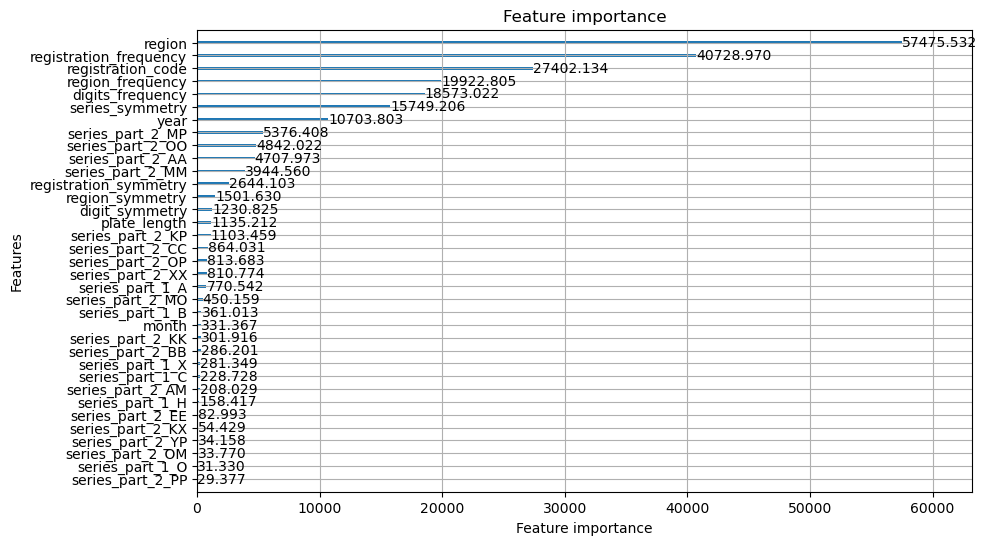

In [152]:
import lightgbm as lgb
import matplotlib.pyplot as plt

# Plot feature importance inside Jupyter Lab
lgb.plot_importance(model, importance_type="gain", figsize=(10, 6))
plt.show()

## XGboost

In [117]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import graphviz
import matplotlib.pyplot as plt

# Custom SMAPE function (for post-training evaluation)
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

# Custom evaluation function for XGBoost
# It transforms predictions back to the original scale using np.expm1
def xgb_smape_eval(preds, dtrain):
    labels = dtrain.get_label()
    labels_orig = np.expm1(labels)
    preds_orig = np.expm1(preds)
    denominator = (np.abs(labels_orig) + np.abs(preds_orig)) / 2.0
    diff = np.abs(labels_orig - preds_orig) / denominator
    diff[denominator == 0] = 0.0
    smape_val = np.mean(diff) * 100
    return 'smape', smape_val

# Assuming df is your DataFrame and 'price_transformed' is the log-transformed target
features = [col for col in df.columns if col not in ['price', 'plate', 'date', 'price_transformed', 'series_part_1', 'series_part_2', 'series', 'price_Box-Cox', 'price_Yeo-Johnson', 'price_Quantile', 'price_log']]
X = df[features].apply(pd.to_numeric)
y = df['price_log']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix objects for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

# XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'eta': 0.05,
    'max_depth': 15,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'lambda': 0.1,
    'alpha': 0.1,
    'seed': 42,
    'verbosity': 0
}

evals = [(dval, 'eval')]

# Train the model with early stopping and custom SMAPE evaluation
model = xgb.train(
    params,
    dtrain,
    num_boost_round=200,
    evals=evals,
    early_stopping_rounds=20,
    verbose_eval=True
)

# Predict on validation set (using the best iteration) and compute SMAPE on original scale
y_pred_log = model.predict(dval)
y_pred = np.expm1(y_pred_log)
y_val_orig = np.expm1(y_val)
smape_score = smape(y_val_orig, y_pred)
print(f"\nFinal SMAPE on validation set: {smape_score:.2f}%")

[0]	eval-rmse:1.13179
[1]	eval-rmse:1.09914
[2]	eval-rmse:1.06767
[3]	eval-rmse:1.04079
[4]	eval-rmse:1.01324
[5]	eval-rmse:0.98727
[6]	eval-rmse:0.96274
[7]	eval-rmse:0.94079
[8]	eval-rmse:0.92067
[9]	eval-rmse:0.90229
[10]	eval-rmse:0.88451
[11]	eval-rmse:0.86984
[12]	eval-rmse:0.85439
[13]	eval-rmse:0.84028
[14]	eval-rmse:0.82668
[15]	eval-rmse:0.81434
[16]	eval-rmse:0.80293
[17]	eval-rmse:0.79281
[18]	eval-rmse:0.78363
[19]	eval-rmse:0.77464
[20]	eval-rmse:0.76678
[21]	eval-rmse:0.75947
[22]	eval-rmse:0.75281
[23]	eval-rmse:0.74691
[24]	eval-rmse:0.74110
[25]	eval-rmse:0.73577
[26]	eval-rmse:0.73032
[27]	eval-rmse:0.72576
[28]	eval-rmse:0.72154
[29]	eval-rmse:0.71734
[30]	eval-rmse:0.71436
[31]	eval-rmse:0.71138
[32]	eval-rmse:0.70805
[33]	eval-rmse:0.70533
[34]	eval-rmse:0.70286
[35]	eval-rmse:0.70015
[36]	eval-rmse:0.69775
[37]	eval-rmse:0.69572
[38]	eval-rmse:0.69375
[39]	eval-rmse:0.69231
[40]	eval-rmse:0.69042
[41]	eval-rmse:0.68881
[42]	eval-rmse:0.68722
[43]	eval-rmse:0.6856

## Autogluon

In [141]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import lightgbm as lgb
import graphviz
from autogluon.tabular import TabularPredictor
from autogluon.core.metrics import make_scorer


def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

def custom_smape_metric(y_true, y_pred):
    # Ensure input is numpy array:
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return smape(y_true, y_pred)

# Set the attribute expected by AutoGluon
custom_smape_metric.needs_proba = False
custom_smape_metric.name = "custom_smape_metric"  # Set a name attribute
custom_smape_metric.greater_is_better_internal = False  # Lower SMAPE is better
custom_smape_metric.needs_pred = True  # Needs raw predictions



drop_cols = ['price', 'plate', 'date', 'price_transformed', 'series_part_1',
             'series_part_2', 'series', 'price_Box-Cox', 'price_Yeo-Johnson',
             'price_Quantile', 'price_log']
features = [col for col in df.columns if col not in drop_cols]
X = df[features].apply(pd.to_numeric)

models = {}

for name, transformer in transformers.items():
    target_col = f'price_{name}'
    data = X.copy()
    data[target_col] = df[target_col]
    
    train_data, val_data = train_test_split(data, test_size=0.2, random_state=42)

    smape_scorer = make_scorer(name='smape1', score_func=smape,greater_is_better=False)

    
    predictor = TabularPredictor(label=target_col, eval_metric=smape_scorer).fit(
        train_data,
        time_limit=9600,
)
    
    #predictor = TabularPredictor(label=target_col,
    #                             eval_metric=custom_smape_metric,
    #                             path=f'AutoGluonModels_{name}').fit(
    #    train_data,
    #    hyperparameters={
    #        'GBM': {
    #            'num_boost_round': 1000,
    #            'learning_rate': 0.05,
    #            'num_leaves': 31,
    #            'verbosity': -1,
    #            'seed': 42
    #        }
    #     },
    #    presets='best_quality',
    #    time_limit=300
    #)
    
    y_pred = predictor.predict(val_data)
    y_pred_original = transformer.inverse_transform(y_pred.values.reshape(-1, 1))
    y_val_original = transformer.inverse_transform(val_data[target_col].values.reshape(-1, 1))
    score = smape(y_val_original.flatten(), y_pred_original.flatten())
    print(f"\nFinal SMAPE on validation set for {name}: {score:.2f}%")
    
    models[name] = predictor


No path specified. Models will be saved in: "AutogluonModels/ag-20250402_101146"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.2
Python Version:     3.12.4
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 24.3.0: Thu Jan  2 20:23:36 PST 2025; root:xnu-11215.81.4~3/RELEASE_ARM64_T8112
CPU Count:          8
Memory Avail:       1.77 GB / 8.00 GB (22.1%)
Disk Space Avail:   3.60 GB / 228.27 GB (1.6%)
	We recommend a minimum available disk space of 10 GB, and large datasets may require more.
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration

[1000]	valid_set's l2: 0.401288	valid_set's smape1: -84.9595
[2000]	valid_set's l2: 0.394511	valid_set's smape1: -83.4511
[3000]	valid_set's l2: 0.392554	valid_set's smape1: -82.2795
[4000]	valid_set's l2: 0.391761	valid_set's smape1: -82.0729
[5000]	valid_set's l2: 0.391942	valid_set's smape1: -82.0451
[6000]	valid_set's l2: 0.392466	valid_set's smape1: -81.9538
[7000]	valid_set's l2: 0.393396	valid_set's smape1: -81.8236
[8000]	valid_set's l2: 0.393978	valid_set's smape1: -81.7374


	-81.6765	 = Validation score   (-smape1)
	10.52s	 = Training   runtime
	0.23s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 9588.47s of the 9588.47s of remaining time.


[1000]	valid_set's l2: 0.337483	valid_set's smape1: -75.8605


	-75.739	 = Validation score   (-smape1)
	2.66s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 9585.73s of the 9585.73s of remaining time.
	-80.8815	 = Validation score   (-smape1)
	15.0s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 9570.38s of the 9570.38s of remaining time.
	-75.3996	 = Validation score   (-smape1)
	31.06s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 9539.29s of the 9539.29s of remaining time.
	-81.5087	 = Validation score   (-smape1)
	12.99s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 9525.94s of the 9525.94s of remaining time.
Metric smape1 is not supported by this model - using mean_squared_error instead
	-88.6777	 = Validation score   (-smape1)
	12.01s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting mod

[1000]	valid_set's l2: 0.337514	valid_set's smape1: -75.2093


	-75.119	 = Validation score   (-smape1)
	11.93s	 = Training   runtime
	0.05s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 959.95s of the 9499.36s of remaining time.
	Ensemble Weights: {'LightGBMLarge': 0.522, 'CatBoost': 0.217, 'LightGBM': 0.13, 'XGBoost': 0.13}
	-74.8097	 = Validation score   (-smape1)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 100.68s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 19986.6 rows/s (2501 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/Users/khabith/Files/Github/Russian-Car-Plates-Prices-Prediction/AutogluonModels/ag-20250402_101146")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X do


Final SMAPE on validation set for Box-Cox: 40.19%
Could not generate tree visualization for model Box-Cox: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead


		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 159 | ['digits_frequency', 'region_frequency', 'registration_frequency', 'series_part_1_A', 'series_part_1_B', ...]
		('int', [])   :  12 | ['plate_length', 'region', 'registration_code', 'digit_symmetry', 'registration_symmetry', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     :   3 | ['digits_frequency', 'region_frequency', 'registration_frequency']
		('int', [])       :   7 | ['region', 'registration_code', 'year', 'month', 'day', ...]
		('int', ['bool']) : 161 | ['plate_length', 'digit_symmetry', 'registration_symmetry', 'region_symmetry', 'series_symmetry', ...]
	0.5s = Fit runtime
	171 features in original data used to generate 171 features in processed data.
	Train Data (Processed) Memory Usage: 7.35 MB (0.4% of available memory)
Data preprocessing and

[1000]	valid_set's l2: 0.405522	valid_set's smape1: -85.4924
[2000]	valid_set's l2: 0.398226	valid_set's smape1: -84.1492
[3000]	valid_set's l2: 0.39541	valid_set's smape1: -83.0637
[4000]	valid_set's l2: 0.394851	valid_set's smape1: -82.5342
[5000]	valid_set's l2: 0.394947	valid_set's smape1: -82.0337
[6000]	valid_set's l2: 0.395603	valid_set's smape1: -82.1034


	-81.949	 = Validation score   (-smape1)
	8.76s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 9590.31s of the 9590.31s of remaining time.


[1000]	valid_set's l2: 0.341853	valid_set's smape1: -76.5091


	-76.0397	 = Validation score   (-smape1)
	2.11s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 9588.13s of the 9588.13s of remaining time.
	-80.7783	 = Validation score   (-smape1)
	13.19s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 9574.60s of the 9574.60s of remaining time.
	-75.6732	 = Validation score   (-smape1)
	27.74s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 9546.83s of the 9546.83s of remaining time.
	-81.7949	 = Validation score   (-smape1)
	13.66s	 = Training   runtime
	0.11s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 9532.76s of the 9532.76s of remaining time.
Metric smape1 is not supported by this model - using mean_squared_error instead
No improvement since epoch 8: early stopping
	-91.8108	 = Validation score   (-smape1)
	13.16s	 = Training   r

[1000]	valid_set's l2: 0.341215	valid_set's smape1: -76.1342


	-75.9456	 = Validation score   (-smape1)
	6.16s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 959.95s of the 9510.93s of remaining time.
	Ensemble Weights: {'LightGBMLarge': 0.44, 'CatBoost': 0.28, 'LightGBM': 0.12, 'RandomForestMSE': 0.12, 'XGBoost': 0.04}
	-75.0496	 = Validation score   (-smape1)
	0.01s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 89.11s ... Best model: WeightedEnsemble_L2 | Estimated inference throughput: 15785.9 rows/s (2501 batch size)
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("/Users/khabith/Files/Github/Russian-Car-Plates-Prices-Prediction/AutogluonModels/ag-20250402_101327")
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:


Final SMAPE on validation set for Yeo-Johnson: 40.30%
Could not generate tree visualization for model Yeo-Johnson: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead


	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
	Stage 4 Generators:
		Fitting DropUniqueFeatureGenerator...
	Stage 5 Generators:
		Fitting DropDuplicatesFeatureGenerator...
	Types of features in original data (raw dtype, special dtypes):
		('float', []) : 159 | ['digits_frequency', 'region_frequency', 'registration_frequency', 'series_part_1_A', 'series_part_1_B', ...]
		('int', [])   :  12 | ['plate_length', 'region', 'registration_code', 'digit_symmetry', 'registration_symmetry', ...]
	Types of features in processed data (raw dtype, special dtypes):
		('float', [])     :   3 | ['digits_frequency', 'region_frequency', 'registration_frequency']
		('int', [])       :   7 | ['region', 'registration_code', 'year', 'month', 'day', ...]
		('int', ['bool']) : 161 | ['plate_length', 'digit_symmetry', 'registration_symmetry', 'region_symmetry', 'series_symmetry', ...]
	0.5s = Fit runtime
	171 features in original data used to

[1000]	valid_set's l2: 0.404807	valid_set's smape1: -86.3478
[2000]	valid_set's l2: 0.398264	valid_set's smape1: -85.1932
[3000]	valid_set's l2: 0.396135	valid_set's smape1: -84.4133
[4000]	valid_set's l2: 0.395621	valid_set's smape1: -84.3775
[5000]	valid_set's l2: 0.397371	valid_set's smape1: -84.1459
[6000]	valid_set's l2: 0.397154	valid_set's smape1: -83.6312
[7000]	valid_set's l2: 0.398064	valid_set's smape1: -83.3459
[8000]	valid_set's l2: 0.398513	valid_set's smape1: -83.4026
[9000]	valid_set's l2: 0.399611	valid_set's smape1: -83.4985


	-83.2845	 = Validation score   (-smape1)
	10.88s	 = Training   runtime
	0.25s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 9588.06s of the 9588.06s of remaining time.
	-77.8698	 = Validation score   (-smape1)
	1.48s	 = Training   runtime
	0.02s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 9586.53s of the 9586.53s of remaining time.
	-82.5907	 = Validation score   (-smape1)
	14.21s	 = Training   runtime
	0.04s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 9572.05s of the 9572.05s of remaining time.
	-77.3284	 = Validation score   (-smape1)
	31.4s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: ExtraTreesMSE ... Training model for up to 9540.63s of the 9540.63s of remaining time.
	-83.7239	 = Validation score   (-smape1)
	11.98s	 = Training   runtime
	0.06s	 = Validation runtime
Fitting model: NeuralNetFastAI ... Training model for up to 9528.13s of the 9528.13s of remaining


Final SMAPE on validation set for Quantile: 40.22%
Could not generate tree visualization for model Quantile: `get_model_names` has been deprecated and will be removed in version 1.2. Please use `model_names` instead


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but QuantileTransformer was fitted with feature names
  warnings.warn(
